 **PA005: High Value Customers Identification (Insiders)**

## Notebook Checkpoints

Seção para acompanhar os principais avanços em cada notebook 

### Ciclo I - Metricas de validacao de clusters
0.1-dhrt-insiders-clustering-metrics

**Feature Engineering**
- Recencia
- Frequencia
- Monetizacao
- Avg ticket
- Avg basket size

**Metricas de validacao de cluster**
- Metricas de avaliação de cluster para k=3 
- WSS (Within-cluster Sum of Square)
- SS (Silhouete Score)

**Cluster Analysis**
- plot3d
- cluster profile

Nesse ciclo foram estabelecidas metricas confiaveis que poderao apontar se esta havendo progressos conforme evolucao dos ciclos

### Ciclo II - Analise de Silhueta
0.2-dhrt-insiders-clustering-metricsII

**Analise de silhueta**
- Silhouete Analysis

**Cluster Visualization** 
- Metricas de avaliação de clusters em dimensionalidades > 3
- UMAP (tecnica para reducao de dimensionalidade)

**Cluster Analysis**
- Descrição dos centroides dos clusters


*Proximos passos*: limpeza dos dados

Continuacao sobre metricas, aqui foi definido metricas mais visuais para analisar a silhueta dos cluster, inclusive para aqueles de dimensionalidade acima de 3, em que visualizacoes padroes em 3D ja nao sao aplicaveis

### Ciclo III - Analise Descritiva
0.3-dhrt-insiders-clustering-feature-engineering-

**Analise descritiva**
- Numericos e categoricos
- Data Description e investigacao superficial dos dados com ruido

**Filtragem de variaveis**
- Retirada valores anomalos. Rever o tratamento dado aqui, em um outro ciclo

**Feature Engineering**
- df_purchase e df_return
- number of returns

**Data Preparation**
- Standard Scaler

Nessa etapa foi feita uma limpeza dos dados com base em algumas anomalias observadas na analise descritiva. Foi feito uma filtragem, pra daí suportar novos calculos na feature engineering, retreinar o modelo e avaliar o progresso das clusterizacoes. Ou seja, o ponto foi fazer limpezas para verificar as melhorias obtidas

### Ciclo IV - Feature Engineering, EDA e Estudo do Espaço 

**Replace NA**
- Recuperado 25% dos NA de customer_id
- Limpeza dos novos dados recuperados

**Feature Engineering**
- avg recency days
- invoice_no
- quantity
- frequency by day

**EDA parte I** 
- univariada (identificacao de outliers e utilizacao do y-profiling)
- bivariada (pairplots)

**Estudo do espaço**
- PCA
- UMAP
- t-SNE
- Tree-Based Embedding

### Ciclo V - Modeling

**Hiperparameter Fine-Tuning**
- K-Means
- GMM
- Hierarchical Clustering
- DBSCAN
 
**Feature Selection**
- (...)

**Cluster Analysis**
- (...) 

**Clusterizacao sobre espaço de embedding - Tree Based** 
- Hiperparameter Fine-Tuning
- Feature Selection
- Cluster Analysis

### Ciclo VI - Model Results

**Refactoring Embedding Spaces**
- drop avg columns

# SOLUTION PLANNING (IOT) 


## Input

1. Problema de negocio
    - Selecionar os clientes mais valiosos para integrar programa de fidelizacao **INSIDERS** 
    
    
2. Conjunto de dados
    - Vendas de um e-commerce online, durante o periodo de um ano (Nov 2015 - Dec 2017) 

## Output

1. Indicação dos clientes que farao parte dos **INSIDER**
    - Lista: 
              |client ID |is_insider |
              |1203      | yes       |
              |...       |...        |
             
            
2. Relatorio com as perguntas de negocio
    - Quem sao as pessoas elegiveis para participar do programa?
    - Quantos clientes farao parte do grupo?
    - Quais as principais caracteristicas desses clientes?
    - Qual a porcentagem de contribuicao do faturamento vinda dos insiders?
    - Qual a expectativa de faturamento desse grupo para os proximos meses?
    - Quais as condicoes para uma pessoa ser elegivel ao Insiders?
    - Quais as condicoes para uma pessoa ser removida do Insiders?
    - Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento? 


## Tasks

**1.  Quem sao as pessoas elegiveis para participar do programa?** <br>
    
   - O que é ser elegivel? o que sao clientes de maior valor? 
   - Faturamento:
        - Alto ticket medio
        - Alto LTV
        - Baixa Recencia
        - Alto basket size
        - Baixa probabilidade de churn
        - Alta previsao LTV
        - Alta propensao de compra
        
   - Custo:
        - Baixa taxa de devolucao 
    
   - Baixa taxa de devolucao
        - Media das avaliações
        
        
**2.  Quantos clientes farao parte do grupo?**
   - Nro de clientes
   - % do nro total de clientes farão parte do insiders 
    
    
**3.  Quais as principais caracteristicas desses clientes?**
   - Escrever caracteristicas do cliente:
        - Idade
        - Pais
        - Salario
    
   - Escrever caracteristicas do consumo:
        - Atributos da clusterizacao
        
        
        
**4.  Qual a porcentagem de contribuicao do faturamento vinda dos insiders?**
   - Faturamento total da emprea
   - Faturamento do grupo Insiders
    

**5.  Qual a expectativa de faturamento desse grupo para os proximos meses?**
   - LTV do grupo Insiders
   - Analise de cohort
   - Series Temporais (ARIMA, Holtwinter, etc) 
    
    
**6.  Quais as condicoes para uma pessoa ser elegivel ao Insiders?**
   - Definir a periodicidade que o modelo sera atualizado 
   - Para ser elegivel a pessoa precisa parecer com uma pessoa do grupo de Insiders
    
    
**7.  Quais as condicoes para uma pessoa ser removida do Insiders?**
   - Definir a periodicidade que o modelo sera atualizado  
   - Para deixar de ser elegivel a pessoa deve deixar de ser parecida com o grupo dos Insiders
    
    
**8.  Qual a garantia que o programa Insiders é melhor que o restante da base?**
   - Teste A/B
   - Teste A/B Bayesiano
   - Teste de hipotese


**9.  Quais ações o time de marketing pode realizar para aumentar o faturamento?** 
   - Desconto
   - preferencia de compra
   - frete
   - visita a empresa


## Benchmark de solucoes

### Desk research

- Modelo RFM

# IMPORTS

In [1]:
import re

import pandas as pd
import seaborn as sns
import numpy as np
import umap.umap_ as umap

from IPython.display     import HTML
from ydata_profiling     import ProfileReport
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from plotly              import express       as px 
from sklearn             import cluster       as c 
from sklearn             import metrics       as m
from sklearn             import preprocessing as pp
from sklearn             import decomposition as dd
from sklearn             import ensemble      as en
from matplotlib          import pyplot        as plt 
from sklearn.manifold    import TSNE
from sklearn             import manifold      as mn
from sklearn             import mixture       as mx
from sklearn.neighbors   import NearestNeighbors
from scipy.cluster       import hierarchy     as hc
        

/home/daniel/miniconda3/envs/ds_em_clusterizacao/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Helper functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
#     plt.rcParams['figure.figsize'] = [24, 9]
#     plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.options.display.float_format = '{:.2f}'.format
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
path = '../data/raw/ecommerce.csv'

df_raw = pd.read_csv (path)

## Data Cleaning

In [127]:
df = df_raw.copy()

df = df.drop(columns=['Unnamed: 8'], axis=1)

In [128]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


# <span style="color: OrangeRed;">DATA DESCRIPTION</span>
<span style="color: OrangeRed;">***PASSO 1***</span>

In [168]:
df1 = df.copy()

## Columns Description

|column|description|
|:-----|:---------|
|invoice_no|identificador de uma compra realizada no ecommerce|
|stock_code|identificador unico do produto comprado|
|description|descricao do produto|
|quantity|quantidade|
|invoice_date|data da compra|
|unit_price|preço unitario do produto|
|customer_id|identificador do comprador|
|country|pais do comprador|

## Rename Columns

In [169]:
new_columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

df1.columns = new_columns

## Data Dimensions

In [170]:
print('Number of rows:{}'.format(df1.shape[0]))
print('Number of rows:{}'.format(df1.shape[1]))

Number of rows:541909
Number of rows:8


## Data Types

In [171]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## Check NA

In [172]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [173]:
# === customer_id ===
# df1 = df1.dropna(subset=['customer_id'],axis=0)
# print('Removed data from subset customer_id: {:.2f}%'.format(100*(1-(df1.shape[0]/df_raw.shape[0]))))

# df separando missing e nao-missing
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]
 
# selecionando invoice do missing no nao-missing, para encontrar correspondencia de customer_id
# df_not_missing.loc[df_not_missing['invoice_no'].isin(df_missing['invoice_no']), :] #Out: []

# Ultimo valor de de customer_id
# df1['customer_id'].max() #Out: 18287

# table of unique invoice that has customer_id missing
invoice_missing = pd.DataFrame(df_missing['invoice_no'].drop_duplicates()).reset_index(drop=True)

# Vector of values to assume sintetic 'customer_id' values
invoice_missing['customer_id'] = np.arange(19000, (19000 + len(invoice_missing)), 1)

# Merge to add sintetic values to orginal dataframe
df1 = pd.merge(df1, invoice_missing, on='invoice_no', how='left')

# Combine to aggregate into unique customer_id column
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# Drop extra columns
df1 = df1.drop(columns=['customer_id_x','customer_id_y'], axis=1)

# ===description=== 
df1['description'] = df1['description'].fillna(0)

#Print missings 
df1.head()
print('\033[1mMissing values:\033[0m \n\n{}'.format(df1.isna().sum()))


Missing values: 

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
country         0
customer_id     0
dtype: int64


### Resumo das operacoes

**'customer_id'** possui 135080 valores nulos de 541909 linhas do dataset. 

- ciclo 1. excluir esses missings<br>
- ciclo 4. substituir por valores sinteticos a partir do proximo numero divisivel por 1000 após o ultimo customer_id
    - Problema: estou considerando que cada customer_id sintetico efetuou apenas uma invoice_no, o que parece nao ser um padrao dentro do conjunto de dado. A solução é robusta apenas para invoice_no (carrinho de compra) que possuem varios produtos


    

**description** nao sera usado em etapas futuras nesse ciclo de estudo, e a substibuição dos missing values por zero, nao alterara o comportamento do fenomeno estudado a principio

## Change Dtypes

In [174]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

In [175]:
# invoice_date     
df1['invoice_date'] = pd.to_datetime(df1['invoice_date']).dt.strftime('%Y-%m-%d')
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

# customer_id     
df1['customer_id'] = df1['customer_id'].astype(int)

In [176]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## Descriptive Statistics

In [177]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [178]:
# Central Tendency - mean, median
c1 = pd.DataFrame(num_attributes.mean()).T
c2 = pd.DataFrame(num_attributes.median()).T

# Dispersion - min, max, range, std, skew, kurtosis
d1 = pd.DataFrame(num_attributes.min()).T
d2 = pd.DataFrame(num_attributes.max()).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.std())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

descriptive_analysis = pd.concat([ d1, d2, d3, c1, d4, c2, d5, d6], axis= 0).T.reset_index()
descriptive_analysis.columns = ['attributes','min','max', 'range','mean','std', 'median', 'skew', 'kurtosis']
descriptive_analysis

,attributes,min,max,range,mean,std,median,skew,kurtosis
0,quantity,-80995.00,80995.00,161990.00,9.55,218.08,3.00,-0.26,119769.16
1,unit_price,-11062.06,38970.00,50032.06,4.61,96.76,2.08,186.51,59005.72
2,customer_id,12346.00,22709.00,10363.00,16688.84,2911.41,16249.00,0.49,-0.80


#### Numerical attributes - Investigating

##### 1. Quantity negativo

In [18]:
# nro de linhas com quantity negativo 
df1[df1['quantity']<=0].shape

(10624, 8)

Ao que parece os registros sao feitos sequencialmente e quando ha devolucao recebe a inicial C. Nao necessariamente a devolucao é feita na mesma data, para customer_id 21642, stock_code 21642, houve a compra de 72 assorted tutti frutti pen em novembro e a devolucao em dezembro. 

In [19]:
# analisando um item para entender comportamento geral
df1.loc[(df1['customer_id']==12985)&(df1['stock_code']=='21642')]#.sort_values('quantity', ascending = False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
459198,575868,21642,ASSORTED TUTTI FRUTTI PEN,72,2017-11-09,0.29,United Kingdom,12985
540079,C581462,21642,ASSORTED TUTTI FRUTTI PEN,-72,2017-12-06,0.29,United Kingdom,12985


##### 2. Preço unitario igual a zero

In [34]:
# unit_price with anomalous values 
print(df1.loc[df1['unit_price']<0.02].shape)

df1.loc[df1['unit_price']<0.02].sort_values('unit_price', ascending = True).head(10)

(2522, 8)


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
299983,A563186,B,Adjust bad debt,1,2017-08-10,-11062.06,United Kingdom,21498
299984,A563187,B,Adjust bad debt,1,2017-08-10,-11062.06,United Kingdom,21499
290583,562386,84596L,0,-21,2017-08-02,0.00,United Kingdom,21453
285790,561924,22042,0,-197,2017-07-30,0.00,United Kingdom,21428
285886,561927,22740,?,-1060,2017-07-30,0.00,United Kingdom,21429
288156,562134,22722,0,1,2017-08-01,0.00,United Kingdom,21438
288157,562135,84847,0,1,2017-08-01,0.00,United Kingdom,21439
288519,562164,21257,?,-94,2017-08-01,0.00,United Kingdom,21440
288872,562212,21187,0,-97,2017-08-01,0.00,United Kingdom,21441
290639,562390,21246,0,-92,2017-08-02,0.00,United Kingdom,21454


### Categorical Attributes

In [24]:
cat_attributes.head()


,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### Categorical attributes - Investigating

##### Invoice no

In [35]:
# problema: invoices com letras e numeros
# df1['invoice_no'].astype(int)

# identificacao:  counting anomalous invoice_no with a letter at beginning
contain_letter = df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x)))
unique_invoice_letter = df1.loc[contain_letter,'invoice_no']
print('invoice_no unicos que contem letras: {}'.format(unique_invoice_letter.drop_duplicates().count()))
print('invoice_no unicos: {}'.format(df1['invoice_no'].unique().shape[0]))
print('Linhas com invoices com letra no inicio: {}'.format(unique_invoice_letter.count()))
print('Linhas com quantidades < 0: {}'.format(df1.loc[df1['quantity']<0,'invoice_no'].count()))

invoice_no unicos que contem letras: 3839
invoice_no unicos: 25900
Linhas com invoices com letra no inicio: 9291
Linhas com quantidades < 0: 10624


In [39]:
unique_invoice_letter


141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
238       C536391
239       C536391
240       C536391
241       C536391
939       C536506
1441      C536543
1442      C536543
1973      C536548
1974      C536548
1975      C536548
1976      C536548
1977      C536548
1978      C536548
1979      C536548
1980      C536548
1981      C536548
1982      C536548
1983      C536548
1984      C536548
1985      C536548
1986      C536548
3170      C536606
3338      C536622
3410      C536625
3693      C536642
3911      C536734
3912      C536734
3919      C536737
4287      C536757
4288      C536758
4306      C536760
4307      C536760
4836      C536807
4837      C536807
4853      C536812
4854      C536812
4855      C536812
4856      C536812
4857      C536812
4858      C536812
4876      C536814
4877      C536814
4878      C536814
4879      C536814
4880      C536814
4881      C536815
4882      C536815
4883      C536816
4884      C536817
4885      C536817
4886      

limit_output extension: Maximum message size of 10000 exceeded with 167269 characters

##### Stock code

In [93]:
# stock_code that contain letter
contain_letter = df1['stock_code'].apply(lambda x: bool(re.search('[^0-9]+',x)))
unique_stock_letter = df1.loc[contain_letter,'stock_code'].drop_duplicates()
print('stock_code unicos com alguma letra: {}'.format(unique_stock_letter.count()))

# unique stock_code all letter
all_letters = df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x)))
unique_stock_all_letter = df1.loc[all_letters,'stock_code'].drop_duplicates()
print('stock_code que contem apenas letras: {}'.format(unique_stock_all_letter.count()))
print('stock code all letters: {}'.format(unique_stock_all_letter.unique()))

# identificação: linhas com stock_code somente letras 
df1.loc[df1['stock_code'].isin(unique_stock_all_letter)]

stock_code unicos com alguma letra: 1124
stock_code que contem apenas letras: 12
stock code all letters: ['POST' 'D' 'DOT' 'M' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY' 'DCGSSGIRL' 'PADS'
 'B' 'CRUK']


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
386,536403,POST,POSTAGE,1,2016-11-29,15.00,Netherlands,12791
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,Germany,12662
1814,536544,DOT,DOTCOM POSTAGE,1,2016-11-29,569.77,United Kingdom,19001
2239,536569,M,Manual,1,2016-11-29,1.25,United Kingdom,16274
2250,536569,M,Manual,1,2016-11-29,18.95,United Kingdom,16274
3041,536592,DOT,DOTCOM POSTAGE,1,2016-11-29,607.49,United Kingdom,19014
5073,536840,POST,POSTAGE,1,2016-11-30,18.00,Germany,12738
5258,536852,POST,POSTAGE,1,2016-12-01,18.00,France,12686


limit_output extension: Maximum message size of 10000 exceeded with 605553 characters

**Ação de limpeza:** dado que nao tenho conhecimento sobre esses valores com apenas letras, vou excluir nessa iteração

##### Description

In [35]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


**Ação:** enquanto nao sei como usar essa coluna para gerar alguma informação, vou exclui-la 

##### Country

In [94]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Pontos que merecem atencao:<br>

- United Kingdom corresponde a quase todo dataset
- European Community aparece mesmo que os paises que se incluem nela aparecem separados 
- Unspecified

In [95]:
df1['country'].value_counts(normalize=True)

United Kingdom         0.91
Germany                0.02
France                 0.02
EIRE                   0.02
Spain                  0.00
Netherlands            0.00
Belgium                0.00
Switzerland            0.00
Portugal               0.00
Australia              0.00
Norway                 0.00
Italy                  0.00
Channel Islands        0.00
Finland                0.00
Cyprus                 0.00
Sweden                 0.00
Unspecified            0.00
Austria                0.00
Denmark                0.00
Japan                  0.00
Poland                 0.00
Israel                 0.00
USA                    0.00
Hong Kong              0.00
Singapore              0.00
Iceland                0.00
Canada                 0.00
Greece                 0.00
Malta                  0.00
United Arab Emirates   0.00
European Community     0.00
RSA                    0.00
Lebanon                0.00
Lithuania              0.00
Brazil                 0.00
Czech Republic      

In [44]:
# customers per country
df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id',ascending=False)

,country,customer_id
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


# <span style="color: OrangeRed;">DATA FILTERING</span>
<span style="color: OrangeRed;">***PASSO 2*** </span>

In [179]:
df2 = df1.copy()

**Ações:**
- **quantity**: separação em df com compras e com devolucoes 
- **unit_price**: exclusao dos registros com preço unico abaixo de 0.01, pois estou assumindo que sejam brindes. Alem disso, preços unitario nulo (ou perto disso) nao acrescentam a receita e só impactam na quantidade de transações do consumidor
- **stock_code**: exclusao de linhas com stock_code com apenas letras  
- **description**: exclusao de description 
- **country**: exclusao de linhas com 'country' que nao esteja na lista de paises do google, que informa respectivos lat/long
- **bad customers**: exclusao aconteceu após analise univariada em uma dos ciclos 

*obs*: filtragem realizada antes da feauture engineering, dado que os calculos sofrerão influencia das medidas agregadas anteriormente

In [180]:
# === Categorical attributes === 
# stock_code
df2 = df2.loc[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS','B', 'CRUK'])]

# description
df2 = df2.drop(columns = ['description'], axis=1)

#country
df2 = df2.loc[~df2['country'].isin(['Unspecified','European Community']), :]

# bad customers
df2 = df2[~df2['customer_id'].isin([16446]) ]


# === Numerical attributes === 
# unit_price above 0.01
df2 = df2.loc[df2['unit_price']>0.01]

# quantity
df_returns = df2.loc[df2['quantity']<0]
df_purchase = df2.loc[df2['quantity']>0]





# <span style="color: OrangeRed;">FEATURE ENGINEERING</span>
<span style="color: OrangeRed;">***PASSO 3***</span>

In [181]:
df3 = df2.copy()

## Feature Creation

In [182]:
# dataframe of unique 'customer_id' to be merged with
df_customers = df2.drop(columns= ['invoice_no', 'stock_code', 'quantity', 'invoice_date',
                                  'unit_price', 'country'],axis=1).drop_duplicates(ignore_index=True)

### Monetary - gross revenue by customers

In [24]:
# monetary or LTV - gross revenue/customer
df_purchase['gross_revenue'] = df_purchase['unit_price']*df_purchase['quantity']
df_monetary = df_purchase.groupby('customer_id')['gross_revenue'].sum().reset_index()
df_monetary = df_monetary.rename(columns = {'gross_revenue':'monetary'})

df_customers = pd.merge(df_customers,df_monetary, on='customer_id', how='left')
df_customers.isna().sum() # 91 linhas com quantity negativo 

customer_id     0
monetary       91
dtype: int64

### Recency - days since last purchase

In [25]:
# recency - days since last purchase
df_recency = df_purchase.groupby('customer_id')['invoice_date'].max().reset_index()
df_recency['recency'] = (df_recency['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency']]
df_recency.head()

df_customers = pd.merge(df_customers,df_recency, on='customer_id', how='left')
df_customers.head()
df_customers.isna().sum()

customer_id     0
monetary       91
recency        91
dtype: int64

### Frequency - purchases/day

In [26]:
# # frequency - purchases/month
# df_purchase['year_month'] = df_purchase['invoice_date'].dt.strftime('%Y-%m')
# df_frequency = df_purchase[['customer_id','year_month','invoice_no']].groupby(['customer_id','year_month']).nunique().reset_index()
# df_frequency = df_frequency.groupby('customer_id')['invoice_no'].mean().reset_index()
# df_frequency = df_frequency.rename (columns = {'invoice_no':'frequency'})
# df_frequency.head()

# df_customers = pd.merge(df_customers,df_frequency, on='customer_id', how='left')
# df_customers.head()
# df_customers.isna().sum()

In [27]:
# frequency - purchases/day
df_aux = (df_purchase[['invoice_no','customer_id','invoice_date']].drop_duplicates().groupby('customer_id')
                                                                           .aggregate (max_   = ('invoice_date','max'),
                                                                                       min_   = ('invoice_date','min'), 
                                                                                       period = ('invoice_date', lambda x: (x.max()-x.min()).days + 1),
                                                                                       invoice_no = ('invoice_no','count'))).reset_index()

df_aux['frequency'] = df_aux.apply(lambda x: x['invoice_no']/x['period'] if x['period']!=0 else 0, axis=1)

df_customers = pd.merge(df_customers, df_aux[['customer_id','frequency']], on='customer_id', how='left')
df_customers.isna().sum()

customer_id     0
monetary       91
recency        91
frequency      91
dtype: int64

### Invoice no - quantity of invoice_no by customers


In [28]:
df_quantity_purchased = df_purchase[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_customers = pd.merge(df_customers,df_quantity_purchased, on='customer_id', how='left')
df_customers.isna().sum()

customer_id     0
monetary       91
recency        91
frequency      91
invoice_no     91
dtype: int64

### Quantity items - total quantity of items  

In [29]:
df_items_purchased = df_purchase[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'quantity_items'})
df_customers = pd.merge(df_customers,df_items_purchased, on='customer_id', how='left')
df_customers.isna().sum()

customer_id        0
monetary          91
recency           91
frequency         91
invoice_no        91
quantity_items    91
dtype: int64

### Quantity products - different stock_code by customer

In [30]:
df_products_purchased = df_purchase[['customer_id','stock_code']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'quantity_products'})
df_customers = pd.merge(df_customers,df_products_purchased, on='customer_id', how='left')
df_customers.isna().sum()

customer_id           0
monetary             91
recency              91
frequency            91
invoice_no           91
quantity_items       91
quantity_products    91
dtype: int64

### Avg ticket - average ticket

In [31]:
# average ticket - gross revenue / count distinct invoice no
df_avg_ticket = df_purchase.groupby('customer_id').aggregate({'invoice_no':'nunique','gross_revenue':'sum'}).reset_index()
df_avg_ticket ['avg_ticket'] = df_avg_ticket['gross_revenue']/df_avg_ticket['invoice_no']
df_avg_ticket = df_avg_ticket.rename ( columns={'invoice_no':'purchases','gross_revenue':'monetary'})
df_avg_ticket = df_avg_ticket[['customer_id','avg_ticket']].copy()

df_customers = pd.merge(df_customers,df_avg_ticket, on='customer_id', how='left')
df_customers.isna().sum()

customer_id           0
monetary             91
recency              91
frequency            91
invoice_no           91
quantity_items       91
quantity_products    91
avg_ticket           91
dtype: int64

### Avg basket - avg basket size  

In [32]:
# average basket Size - total number of items sold / count distinct invoice no 
df_avg_basket = df_purchase.groupby('customer_id').aggregate({'quantity':'sum','invoice_no':'nunique'}).reset_index()
df_avg_basket['avg_basket'] = df_avg_basket['quantity']/df_avg_basket['invoice_no']
df_avg_basket = df_avg_basket[['customer_id','avg_basket']].copy()

df_customers = pd.merge(df_customers,df_avg_basket, on='customer_id', how='left')
df_customers.isna().sum()

customer_id           0
monetary             91
recency              91
frequency            91
invoice_no           91
quantity_items       91
quantity_products    91
avg_ticket           91
avg_basket           91
dtype: int64

### Unique products basket - distinct products for each invoice 

In [33]:
df_unique_products_basket = df_purchase.groupby('customer_id').aggregate({'invoice_no':'nunique','stock_code':'nunique'}).reset_index()
df_unique_products_basket['unique_products_basket'] = df_unique_products_basket['stock_code']/df_unique_products_basket['invoice_no']
df_unique_products_basket = df_unique_products_basket.loc[:,['customer_id','unique_products_basket']]

df_customers = pd.merge(df_customers,df_unique_products_basket, on='customer_id', how='left')
df_customers.isna().sum()

customer_id                0
monetary                  91
recency                   91
frequency                 91
invoice_no                91
quantity_items            91
quantity_products         91
avg_ticket                91
avg_basket                91
unique_products_basket    91
dtype: int64

### Returns - number of returns

In [34]:
df_returns[['customer_id','quantity']].drop_duplicates()

,customer_id,quantity
154,15311,-1
235,17548,-12
236,17548,-24
939,17897,-6
1441,17841,-1
1442,17841,-2
1973,12472,-4
1974,12472,-5
1975,12472,-1
1976,12472,-7


limit_output extension: Maximum message size of 10000 exceeded with 320562 characters

In [35]:
# Number of returns 
df_returns = df_returns[['customer_id','quantity']].drop_duplicates().groupby('customer_id').sum().reset_index().rename(columns={'quantity':'returns'})
df_returns['returns'] = df_returns['returns']*(-1)
df_customers = pd.merge(df_customers, df_returns,how='left',on='customer_id')
df_customers.loc[df_customers['returns'].isna(),'returns'] = 0
df_customers.isna().sum()

# first_purchase_at - min invoice_date

customer_id                0
monetary                  91
recency                   91
frequency                 91
invoice_no                91
quantity_items            91
quantity_products         91
avg_ticket                91
avg_basket                91
unique_products_basket    91
returns                    0
dtype: int64

### Avg recency - average recency days

In [36]:
df_aux = df_purchase[['customer_id','invoice_date']].drop_duplicates().sort_values(['customer_id','invoice_date'], ascending=[False,False]).reset_index(drop=True)

df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['next_invoice_date'] = df_aux['invoice_date'].shift()

df_aux['avg_recency'] = df_aux.apply(lambda x: (x['next_invoice_date'] - x['invoice_date']).days if x['next_customer_id'] == x['customer_id'] else np.nan, axis=1)

df_aux = df_aux.drop(['next_customer_id','next_invoice_date','invoice_date'], axis=1).dropna()

df_aux = df_aux.groupby('customer_id').mean().reset_index()

df_customers = pd.merge(df_customers, df_aux, on ='customer_id',how='left')
df_customers.isna().sum()

customer_id                  0
monetary                    91
recency                     91
frequency                   91
invoice_no                  91
quantity_items              91
quantity_products           91
avg_ticket                  91
avg_basket                  91
unique_products_basket      91
returns                      0
avg_recency               3013
dtype: int64

### RESUMO DAS OPERAÇÕES REALIZADAS

**monetary**<br>
- 0.3: monetary foi calculado com base no faturamento filtrado apenas pelas quantity positivas. Essa escolha pode gerar um erro ao avaliar um possivel comprador que compra e devolve com tickets muito alto, como um que possui monetary alto. Talvez o melhor fosse considerar o saldo 

**recency**<br>
- 0.3: recency foi calculado com base na ultima compra, dado que o ultimo registo pode ser uma devolucao, e nao faz sentido considerar esse registro para avaliar a recencia de um cliente

**frequency**<br>
- 0.3: frequencia/mes sem contar as devoluções
- 0.4: frequencia/dia sem contar as devolucoes 

**avg_ticket**<br>
- 0.3: sem contar as devolucoes

**avg_basket_size**<br>
- 0.3: sem contar as devolucoes

**returns**
- 0.4: numero de retornos

**avg_recency_days**
- 0.4: media das diferencas entre as invoice_date de cada cliente. Foi feito uma escolha de excluir as recencias NaN ou igual a 0, porem isso pode estar errado por conta da imputação dos 25% de dados com customer_id com missing's, operação que nao considera mais de um invoice_no diferente para cada customer_id

**invoice_no (quantity purchased)**
- 0.4: quantity of different invoice_no per customer_id

**quantity**
- 0.4: quantity of products purchases per customer_id


In [38]:
path = '/home/daniel/repos/ds_em_clusterizacao/pa005_insiders_clustering/data/processed/'

df_customers.to_csv(path+'feature_engineering.csv', index=False)

In [39]:
df_customers.shape

(5786, 12)

#  <span style="color: OrangeRed;">EXPLORATORY DATA ANALYSIS (EDA) PT1</span>
<span style="color: OrangeRed;">***PASSO 4*** </span>

In [4]:
#leitura do csv após feature engineering
path = '/home/daniel/repos/ds_em_clusterizacao/pa005_insiders_clustering/data/processed/'
df4 = pd.read_csv(path+'feature_engineering.csv')
df4.head()

,customer_id,monetary,recency,frequency,invoice_no,quantity_items,quantity_products,avg_ticket,avg_basket,unique_products_basket,returns,avg_recency
0,17850,5391.21,372.00,17.00,34.00,1733.00,297.00,158.56,50.97,0.62,21.00,1.00
1,13047,3232.59,56.00,0.03,9.00,1390.00,171.00,359.18,154.44,11.67,6.00,52.83
2,12583,6705.38,2.00,0.04,15.00,5028.00,232.00,447.03,335.20,7.60,50.00,26.50
3,13748,948.25,95.00,0.02,5.00,439.00,28.00,189.65,87.80,4.80,0.00,92.67
4,15100,876.00,333.00,0.07,3.00,80.00,3.00,292.00,26.67,0.33,22.00,20.00


In [5]:
# df4 = df_customers.dropna().copy() 
df4 = df4.dropna().copy() 
# exclusao dos 91 clientes que nao possuem nenhuma compra, e 3013 que só fizeram uma compra e, por isso, nao tem media de recencia


In [5]:
df4.shape

(2773, 12)

## Univariate Analysis


**Metricas para analisar**

1. Clusters coesos-separados
2. Metricas
    - min, max, range
    - media e mediana
    - std e variancia
    - coeficiente de variacao
    - distribuicao

**Investigar**
*outliers, possiveis fraudes, dados que acionem um alerta!*

1. Monetary - ok 
2. Frequency - ok 
3. quantity_items - ok 
4. avg ticket - cliente com duas compras irrelevantes, e uma com um estorno total  
5. avg basket - 
6. returns


In [43]:
profile = ProfileReport(df4, title="Profiling Report")

In [137]:
profile.to_file("univariate_analysis.html")

Summarize dataset:  43%|▍| 70/163 [00:15<00:27,  3.35it/s, scatter quantity_prod

limit_output extension: Maximum message size of 10000 exceeded with 10044 characters

### Monetary

In [90]:
# ordenar maior para menor para capturar o customer_id outlier em termos de receita
df4.sort_values('monetary', ascending=False) 

# detalhe sobre o outlier
df2.loc[df2['customer_id']==14646, :].sort_values('quantity',ascending=False)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
421601,573003,23084,2400,2017-10-25,2.08,Netherlands,14646
409248,572052,22595,1728,2017-10-18,0.72,Netherlands,14646
63444,541570,21212,1440,2017-01-17,0.42,Netherlands,14646
534952,581175,23084,1440,2017-12-05,1.79,Netherlands,14646
186820,552883,21212,1200,2017-05-10,0.42,Netherlands,14646
204198,554642,22243,960,2017-05-23,1.45,Netherlands,14646
137027,548011,22630,640,2017-03-27,1.65,Netherlands,14646
137026,548011,22629,640,2017-03-27,1.65,Netherlands,14646
454041,575508,22492,576,2017-11-08,0.55,Netherlands,14646
408892,572035,22492,576,2017-10-18,0.55,Netherlands,14646


limit_output extension: Maximum message size of 10000 exceeded with 404968 characters

<AxesSubplot: xlabel='monetary', ylabel='Count'>

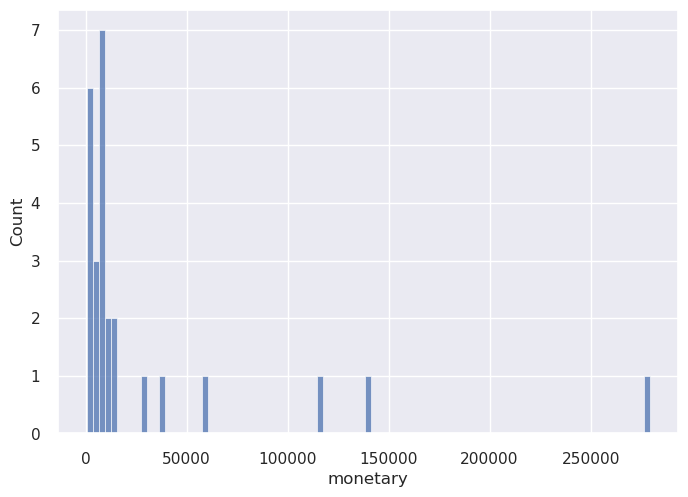

In [80]:
# Distribuição dos clientes nas faixas de receita
sns.histplot(df4['monetary'], binwidth=30)

### Frequency

Outlier com 17 compras/dia. Apesar disso, aparenta ter um comportamento de compra normal, por exemplo, com **ticket medio** e **tamanho medio da cesta** condizente com essa **frequencia**

In [50]:
df4.loc[df4['frequency']==17]

,customer_id,monetary,recency,frequency,invoice_no,quantity_items,quantity_products,avg_ticket,avg_basket,unique_products_basket,returns,avg_recency
0,17850,5391.21,372.00,17.00,34.00,1733.00,297.00,158.56,50.97,0.62,-4.00,1.00


In [53]:
df2.loc[df2['customer_id']==17850]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850
5,536365,22752,2,2016-11-29,7.65,United Kingdom,17850
6,536365,21730,6,2016-11-29,4.25,United Kingdom,17850
7,536366,22633,6,2016-11-29,1.85,United Kingdom,17850
8,536366,22632,6,2016-11-29,1.85,United Kingdom,17850
47,536372,22632,6,2016-11-29,1.85,United Kingdom,17850


limit_output extension: Maximum message size of 10000 exceeded with 61745 characters

### Quantity items

Cliente com maior valor de itens comprados é tambem o com maior monetary

In [54]:
# Lista em ordem decrescente de quantidade de itens
df4.sort_values('quantity_items', ascending=False)


,customer_id,monetary,recency,frequency,invoice_no,quantity_items,quantity_products,avg_ticket,avg_basket,unique_products_basket,returns,avg_recency
1017,14646,279138.02,1.00,0.20,72.00,196844.00,2060.00,3876.92,2733.94,9.71,-1.00,8.02
3338,16446,168472.50,0.00,0.01,2.00,80997.00,3.00,84236.25,40498.50,1.50,-1.00,205.00
66,14911,140450.72,1.00,0.53,199.00,80263.00,5673.00,705.78,403.33,8.97,-26.00,2.86
1150,12415,124564.53,24.00,0.06,20.00,77373.00,713.00,6228.23,3868.65,22.15,-7.00,22.36
434,17450,194550.79,8.00,0.13,46.00,69993.00,337.00,4229.36,1521.59,2.70,-3.00,13.81
15,17511,91062.38,2.00,0.08,31.00,64549.00,963.00,2937.50,2082.23,14.61,-7.00,13.74
492,18102,259657.30,0.00,0.16,60.00,64124.00,431.00,4327.62,1068.73,2.50,0.00,14.68
36,13694,65039.62,3.00,0.13,50.00,63312.00,568.00,1300.79,1266.24,7.32,-6.00,10.88
826,14298,51527.30,8.00,0.12,44.00,58343.00,1637.00,1171.08,1325.98,20.09,-2.00,14.67
191,14156,117379.63,9.00,0.15,55.00,57885.00,1400.00,2134.18,1052.45,12.98,-12.00,8.62


limit_output extension: Maximum message size of 10000 exceeded with 814062 characters

### Avg ticket

**O cliente 16446 possui o maior ticket medio com apenas 2 compras, sendo que a puxa essa media pra cima foi estornada. Esse outlier pode ser tirado do conjunto**

In [57]:
# Lista ordem decrescente de ticket medio
df4.sort_values('avg_ticket', ascending=False).head(10)



,customer_id,monetary,recency,frequency,invoice_no,quantity_items,quantity_products,avg_ticket,avg_basket,unique_products_basket,returns,avg_recency
3338,16446,168472.50,0.00,0.01,2.00,80997.00,3.00,84236.25,40498.50,1.50,-1.00,205.00
1262,15749,44534.30,235.00,0.03,3.00,18028.00,10.00,14844.77,6009.33,1.67,-5.00,97.00
1150,12415,124564.53,24.00,0.06,20.00,77373.00,713.00,6228.23,3868.65,22.15,-7.00,22.36
492,18102,259657.30,0.00,0.16,60.00,64124.00,431.00,4327.62,1068.73,2.50,0.00,14.68
434,17450,194550.79,8.00,0.13,46.00,69993.00,337.00,4229.36,1521.59,2.70,-3.00,13.81
2393,12435,7829.89,79.00,0.01,2.00,2055.00,36.00,3914.95,1027.50,15.50,0.00,188.00
1441,14088,50491.81,10.00,0.04,13.00,12665.00,589.00,3883.99,974.23,29.15,-1.00,28.36
1017,14646,279138.02,1.00,0.20,72.00,196844.00,2060.00,3876.92,2733.94,9.71,-1.00,8.02
3623,12409,11072.67,78.00,0.03,3.00,5551.00,109.00,3690.89,1850.33,30.33,-2.00,52.00
730,12753,21429.39,22.00,0.02,6.00,11421.00,197.00,3571.57,1903.50,22.00,-12.00,68.00


In [58]:
# Outlier 
# df2.loc[df2['customer_id']==14646, :] 

df2.loc[df2['customer_id']==15749, :] 


,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
52709,540815,85123A,1930,2017-01-09,2.55,United Kingdom,15749
52710,540815,21175,2000,2017-01-09,1.85,United Kingdom,15749
52711,540815,21108,3114,2017-01-09,2.10,United Kingdom,15749
52771,540818,47556B,1300,2017-01-09,2.55,United Kingdom,15749
52772,540818,48185,670,2017-01-09,6.75,United Kingdom,15749
160141,C550456,48185,-670,2017-04-16,6.75,United Kingdom,15749
160142,C550456,47566B,-1300,2017-04-16,2.55,United Kingdom,15749
160143,C550456,85123A,-1930,2017-04-16,2.55,United Kingdom,15749
160144,C550456,21175,-2000,2017-04-16,1.85,United Kingdom,15749
160145,C550456,21108,-3114,2017-04-16,2.10,United Kingdom,15749


Analisando o cliente abaixo, é possivel ver que o ticket medio seria bem menor se fosse considerado as devolucoes. 

In [61]:
df_purchase.loc[df_purchase['customer_id']==15749]


,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
52709,540815,85123A,1930,2017-01-09,2.55,United Kingdom,15749
52710,540815,21175,2000,2017-01-09,1.85,United Kingdom,15749
52711,540815,21108,3114,2017-01-09,2.10,United Kingdom,15749
52771,540818,47556B,1300,2017-01-09,2.55,United Kingdom,15749
52772,540818,48185,670,2017-01-09,6.75,United Kingdom,15749
160542,550461,85123A,1930,2017-04-16,2.40,United Kingdom,15749
160543,550461,47556B,1300,2017-04-16,2.10,United Kingdom,15749
160544,550461,48185,670,2017-04-16,6.35,United Kingdom,15749
160545,550461,21175,2000,2017-04-16,1.69,United Kingdom,15749
160546,550461,21108,3114,2017-04-16,2.10,United Kingdom,15749


### Avg basket

Mesmos dois primeiros outliers do avg_ticket

In [70]:
df4.loc[df4['avg_basket'] == 40498.5]


,customer_id,monetary,recency,frequency,invoice_no,quantity_items,quantity_products,avg_ticket,avg_basket,unique_products_basket,returns,avg_recency
3338,16446,168472.50,0.00,0.01,2.00,80997.00,3.00,84236.25,40498.50,1.50,-1.00,205.00


In [71]:
df4.sort_values('avg_basket', ascending = False)

,customer_id,monetary,recency,frequency,invoice_no,quantity_items,quantity_products,avg_ticket,avg_basket,unique_products_basket,returns,avg_recency
3338,16446,168472.50,0.00,0.01,2.00,80997.00,3.00,84236.25,40498.50,1.50,-1.00,205.00
1262,15749,44534.30,235.00,0.03,3.00,18028.00,10.00,14844.77,6009.33,1.67,-5.00,97.00
1150,12415,124564.53,24.00,0.06,20.00,77373.00,713.00,6228.23,3868.65,22.15,-7.00,22.36
1027,13027,6912.00,113.00,0.02,6.00,17280.00,26.00,1152.00,2880.00,1.00,0.00,48.20
1017,14646,279138.02,1.00,0.20,72.00,196844.00,2060.00,3876.92,2733.94,9.71,-1.00,8.02
831,17404,31781.82,4.00,0.04,13.00,32744.00,195.00,2444.76,2518.77,8.38,-3.00,29.67
1723,12754,3010.74,235.00,0.04,3.00,6481.00,63.00,1003.58,2160.33,16.33,0.00,36.50
15,17511,91062.38,2.00,0.08,31.00,64549.00,963.00,2937.50,2082.23,14.61,-7.00,13.74
2548,16308,2560.00,37.00,0.02,4.00,8000.00,4.00,640.00,2000.00,0.25,0.00,74.67
730,12753,21429.39,22.00,0.02,6.00,11421.00,197.00,3571.57,1903.50,22.00,-12.00,68.00


limit_output extension: Maximum message size of 10000 exceeded with 814062 characters

### Returns

1. customer_id com > return é aquele com apenas uma compra grande, e que foi estornada
2. segundo customer_id com maior return, teve apenas uma compra grande estornada, mas tem comportamento de compra normal 

In [102]:
df4.sort_values('returns', ascending = False).head()

,customer_id,monetary,recency,frequency,invoice_no,quantity_items,quantity_products,avg_ticket,avg_basket,unique_products_basket,returns,avg_recency
3338,16446,168472.50,0.00,0.01,2.00,80997.00,3.00,84236.25,40498.50,1.50,80995.00,205.00
160,15838,33643.08,11.00,0.05,19.00,18368.00,167.00,1770.69,966.74,2.84,9360.00,25.43
1262,15749,44534.30,235.00,0.03,3.00,18028.00,10.00,14844.77,6009.33,1.67,9014.00,97.00
12,16029,72882.09,38.00,0.18,62.00,40207.00,241.00,1175.52,648.50,0.69,4824.00,9.05
970,12931,42055.96,21.00,0.04,15.00,28004.00,82.00,2803.73,1866.93,1.87,4027.00,30.55


In [103]:
# Segundo customer_id com maior return 
df2.loc[df2['customer_id']==15838]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
4287,C536757,84347,-9360,2016-11-30,0.03,United Kingdom,15838
14269,537476,22379,150,2016-12-05,1.85,United Kingdom,15838
14270,537476,22381,100,2016-12-05,1.85,United Kingdom,15838
14271,537476,85099B,300,2016-12-05,1.65,United Kingdom,15838
79207,542921,22379,100,2017-01-31,1.85,United Kingdom,15838
79208,542921,22381,50,2017-01-31,1.85,United Kingdom,15838
115895,546160,22742,48,2017-03-08,2.55,United Kingdom,15838
115896,546160,22743,48,2017-03-08,2.55,United Kingdom,15838
115897,546160,22746,60,2017-03-08,1.85,United Kingdom,15838
115898,546160,22748,60,2017-03-08,1.85,United Kingdom,15838


limit_output extension: Maximum message size of 10000 exceeded with 34077 characters

## Bivariate Analysis

<Figure size 2500x1200 with 0 Axes>

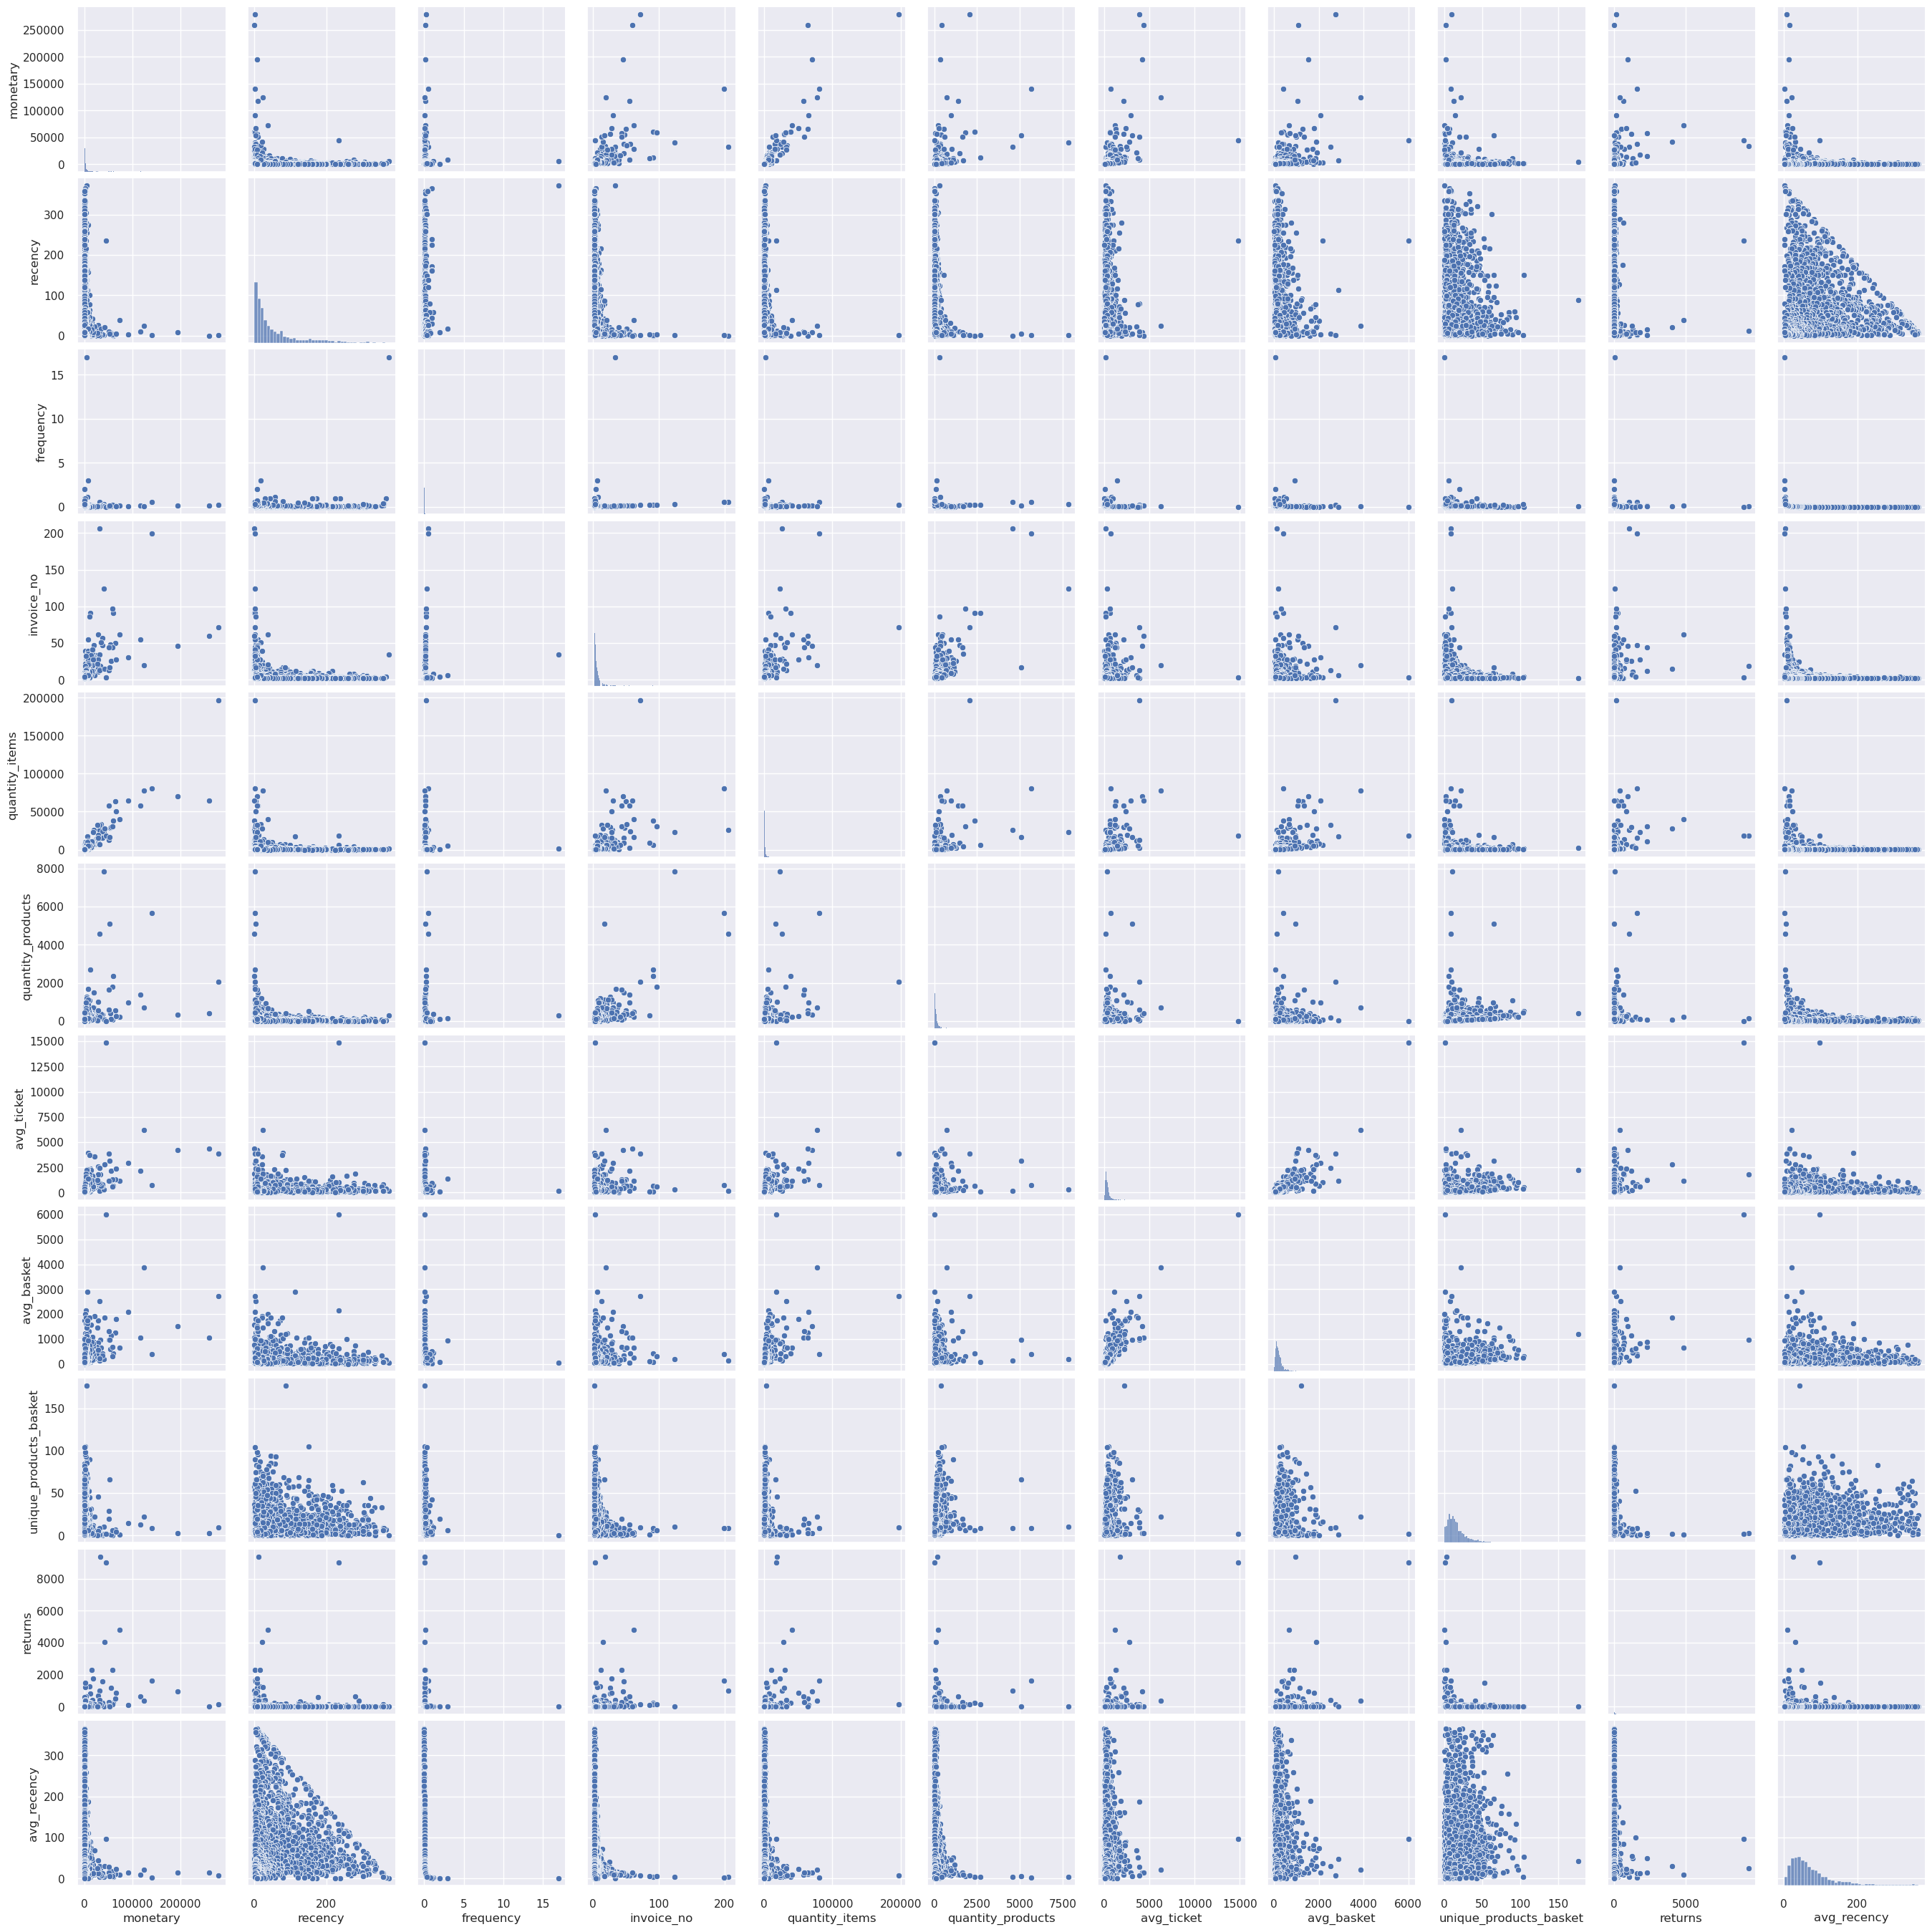

In [44]:
df_aux = df4.drop(columns = 'customer_id').copy()
plt.figure(figsize=(25,12   ))
sns.pairplot(df_aux)


## Estudo do espaço 

In [6]:
# original dataset
# df43 = df4.drop(columns='customer_id', axis=1).copy()

# selected dataset without avg features
cols_selected = ['customer_id','monetary', 'recency', 'frequency', 'quantity_products', 'returns']
df43 = df4[cols_selected].copy()

In [7]:
# MinMax Scaler
mm = pp.MinMaxScaler()

# Apply scalers
df43[['monetary' ]]              = mm.fit_transform(df43[['monetary' ]])
df43[['recency']]                = mm.fit_transform(df43[['recency']]) 
df43[['frequency']]              = mm.fit_transform(df43[['frequency']]) 
# df43[['invoice_no']]             = mm.fit_transform(df43[['invoice_no']])
# df43[['quantity_items']]         = mm.fit_transform(df43[['quantity_items']])
df43[['quantity_products']]      = mm.fit_transform(df43[['quantity_products']])
# df43[['avg_ticket']]             = mm.fit_transform(df43[['avg_ticket']])
# df43[['avg_basket']]             = mm.fit_transform(df43[['avg_basket']])
# df43[['unique_products_basket']] = mm.fit_transform(df43[['unique_products_basket']]) 
df43[['returns']]                = mm.fit_transform(df43[['returns']]) 
# df43[['avg_recency']]            = mm.fit_transform(df43[['avg_recency']])

X = df43.copy()

### PCA


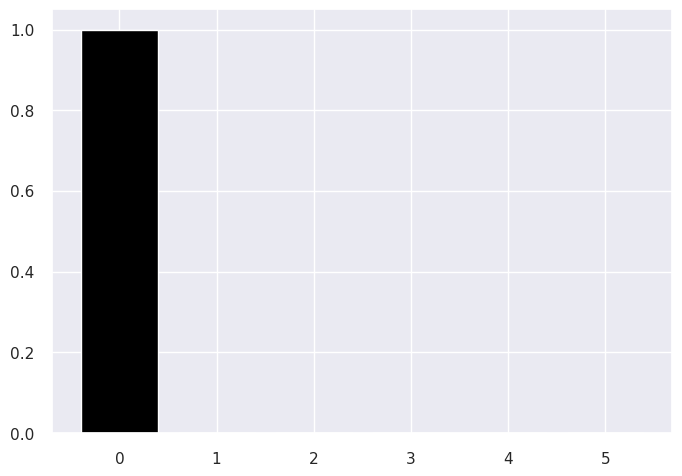

In [8]:
pca = dd.PCA(n_components = X.shape[1])

principal_components = pca.fit_transform(X)

# plot
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color = 'black')

# to dataframe
df_pca = pd.DataFrame(principal_components)

In [9]:
df_pca.shape

(2773, 6)

<AxesSubplot: xlabel='0', ylabel='1'>

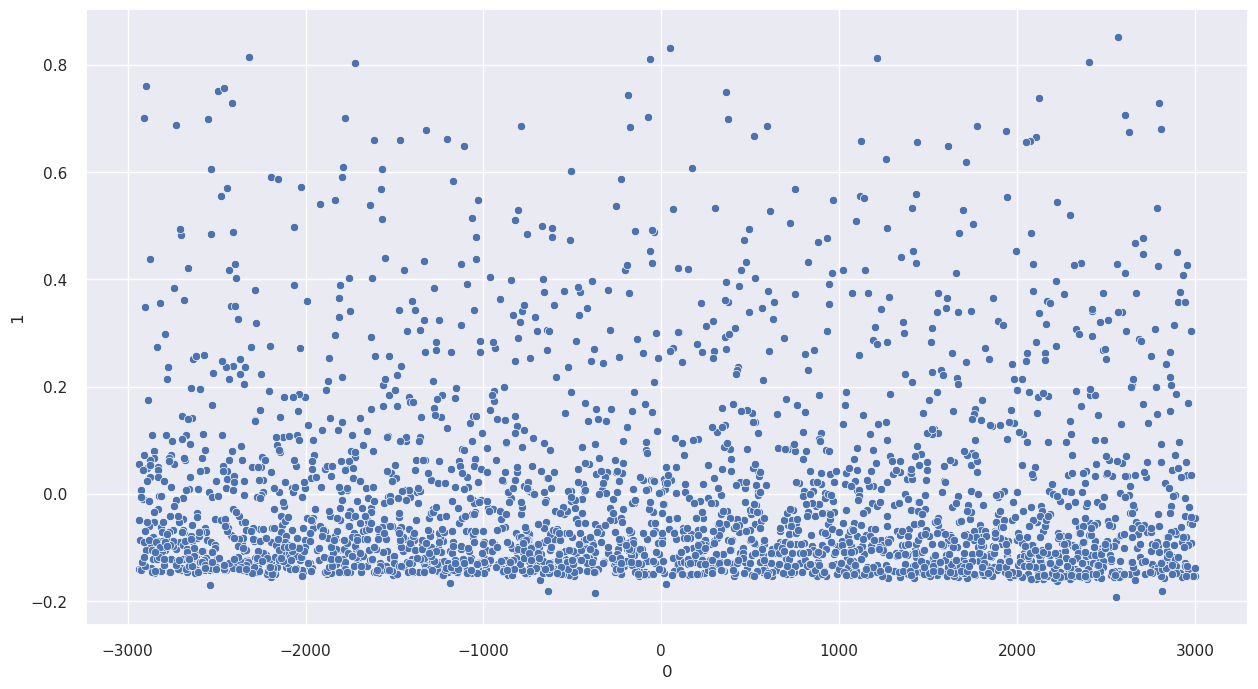

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=0, y=1, data= df_pca)

### UMAP

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

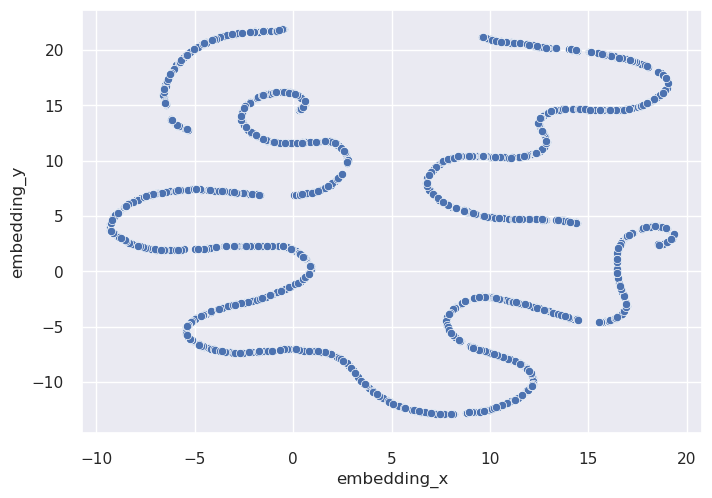

In [11]:
reducer = umap.UMAP (random_state=42) #n_neighbors quanto menor, ele foca mais nas estruturas locais em vez das globais
embedding = reducer.fit_transform (X) #espaço projetado após reducao de dimensionalidade

#embedding
df_pca ['embedding_x'] = embedding[:, 0]
df_pca ['embedding_y'] = embedding[:,1]

# plot embeding
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data = df_pca)



### t-SNE


<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

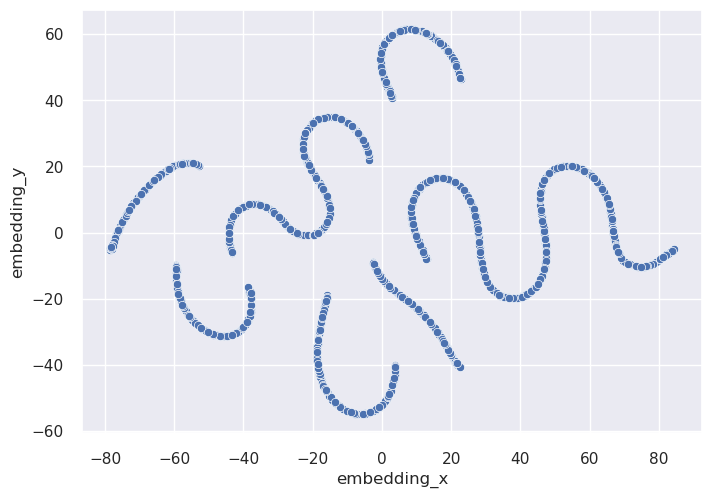

In [12]:
reducer = TSNE (n_components =2, 
                     n_jobs=-1,
                     random_state=42) #n_neighbors quanto menor, ele foca mais nas estruturas locais em vez das globais
embedding = reducer.fit_transform (X) #espaço projetado após reducao de dimensionalidade

#embedding
df_pca ['embedding_x'] = embedding[:, 0]
df_pca ['embedding_y'] = embedding[:,1]

# plot embeding
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data = df_pca)


### Tree Based Embedding


Como é um problema nao supervisionado, foi definido uma variavel resposta para aplicar o embeding modelo de árvore. A variavel escolhida foi a receita total do cliente, que melhor reflete o seu valor para a empresa

In [8]:
# Training dataset
# X = df4.drop(columns=['customer_id','monetary'], axis=1)
# y = df4['monetary']
X = df43.drop(columns=['customer_id','monetary'], axis=1)
y = df43['monetary']


# Model definition
rf_model = en.RandomForestRegressor(n_estimators = 100, random_state=42)

# Model training
rf_model.fit (X, y)

# dataframe Leaf
df_leaf = pd.DataFrame(rf_model.apply(X))



In [9]:
# X.shape #Out: (2774, 100)
# df_leaf.shape. #Out:(2774, 10) 

Com o metodo .apply(X) sobre o modelo treinado, foi apresentado as posicoes que cada uma das 100 arvores atribuiu a cada um dos 2774 clientes. Assim, verifica-se que a RandomForest criou um espaço de embedding onde é possivel clusterizar os clientes. **Porem**, como nao possivel representar 100 dimensoes sera aplicado um redutor, no caso, o UMAP



<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

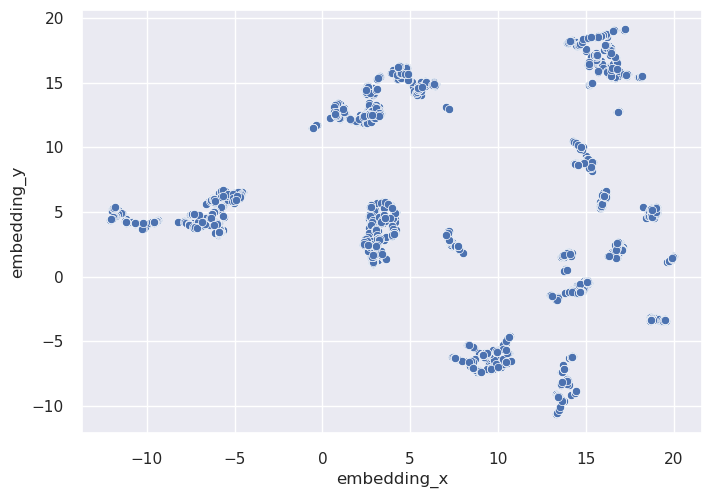

In [10]:
reducer = umap.UMAP (random_state=42) #n_neighbors quanto menor, ele foca mais nas estruturas locais em vez das globais
embedding = reducer.fit_transform (df_leaf) #espaço projetado após reducao de dimensionalidade

#embedding
df_tree = pd.DataFrame()
df_tree ['embedding_x'] = embedding[:, 0]
df_tree ['embedding_y'] = embedding[:,1]

# plot embeding
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data = df_tree)


Com esse espaço de embedding, é possivel ver cluster mais coesos e separados entre si. Como nao é necessario a explicabilidade do processo para o time de negocio, apenas apresentar as caracteristicas dos clientes dos clusters essa solucao cai bem. 

**Aplicabilidade para problemas de classificação e regressao**

O espaço de embedding ajuda tambem nos problemas classicos de regressao e classificação tornando possivel treinar um modelo sobre esse espaço mais organizado. Para isso, basta definir como 'X' esse espeço de embedding e como 'y' a propria variavel resposta. 

# <span style="color: OrangeRed;">DATA PREPARATION</span>
<span style="color: OrangeRed;">***PASSO 5*** </span>

In [11]:
# df5 = df4.copy()

# dataset auxiliar para avaliar scalers 
# df5_aux = df4.copy() 

# Espaço de embedding - Tree Based
df5 = df_tree.copy()

In [85]:
# # Scalers - em comentario ja que o espaço embedding (utilizado na iteração mais recente) dado pela RandomForest nao precisa de rescala
# mms = pp.MinMaxScaler()
# ss = pp.StandardScaler()
# rs = pp.RobustScaler()


# df5['monetary'] = mms.fit_transform(df5[['monetary']])

# df5['recency'] = mms.fit_transform(df5[['recency']])

# df5['frequency'] = mms.fit_transform(df5[['frequency']])

# # df5['invoice_no'] = mms.fit_transform(df5[['invoice_no']])

# # df5['quantity_items'] = mms.fit_transform(df5[['quantity_items']])

# df5['quantity_products'] = mms.fit_transform(df5[['quantity_products']])

# # df5['avg_ticket'] = mms.fit_transform(df5[['avg_ticket']])

# # df5['avg_basket'] = mms.fit_transform(df5[['avg_basket']])

# # df5['unique_products_basket'] = mms.fit_transform(df5[['unique_products_basket']])

# df5['returns'] = mms.fit_transform(df5[['returns']])

# # df5['avg_recency'] = mms.fit_transform(df5[['avg_recency']])


# # para testar os scalers
# # variable = 'recency'

In [86]:
# No transformed - plot distribuition
# print('Min:{} - MAx: {}'.format(df5_aux[variable].min(), df5_aux[variable].max()))
# sns.displot(data=df5_aux, x= variable)

In [87]:
# Transformed - plot distribuition
# print('Min:{} - MAx: {}'.format(df5[variable].min(), df5[variable].max()))
# sns.displot(data=df5, x= variable)

# <span style="color: OrangeRed;">FEATURE SELECTION</span>
<span style="color: OrangeRed;">***PASSO 6*** </span>

A seleção se dara por entedimentos sobre o negocio.<br>

Algumas variaveis são derivações obtidas na **feature engineering**, por exemplo:
- quantity_items 
- quantity_products
- avg_basket
- etc.. 

Como possuem uma distribuição muito parecida na analise bivariada, é necessario entender *restrições/necessidade* de se trabalhar com todas. No caso negativo, é preferivel optar por uma delas

In [88]:
# cols_selected = ['customer_id','monetary', 'recency', 'frequency', 'quantity_products', 'returns']

In [12]:
# Sem seleção de features
# df6 = df5.copy()

# Features selecionadas
# df6 = df5[cols_selected].copy()

# Espaço de embedding - Tree Based 
df6 = df_tree.copy()

# <span style="color: OrangeRed;">HYPERPARAMETER FINE-TUNNING </span>
<span style="color: OrangeRed;">***PASSO 7***</span>

In [13]:
# X = df6.drop(columns=['customer_id'])
# X.head()

# Eapaço de embeding - Tree Based
X = df_tree.copy()

In [14]:
# clusters = [2, 3, 4, 5, 6, 7]

# List of clusters for embeding space 
clusters = np.arange(2, 26, 1)

## K-Means

In [22]:
kmeans_list = []
for k in  clusters:
    # model name
    kmeans_model = c.KMeans(init = 'random',n_clusters = k )

    # model training
    kmeans_model.fit (X)

    # model predict
    labels = kmeans_model.predict(X)

    # perfomance
    sil_score = m.silhouette_score(X, labels, metric = 'euclidean')
    
    kmeans_list.append (sil_score)

Text(0, 0.5, 'Silhoette Score')

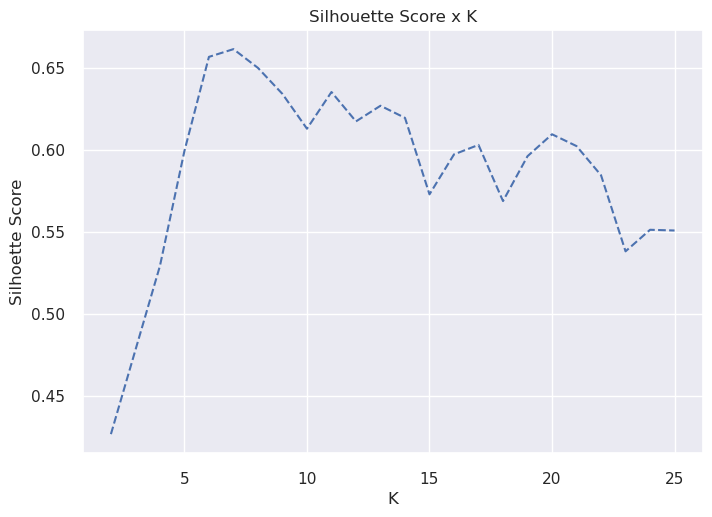

In [23]:
sns.lineplot(x = clusters, y = kmeans_list, markers='o', linestyle = '--', color = 'b' )
plt.title('Silhouette Score x K')
plt.xlabel ('K')
plt.ylabel ('Silhoette Score')

## Gaussian Mixture Models

In [24]:
gmm_list = []
for k in clusters:
    # model name
    gmm_model = mx.GaussianMixture (n_components = k)

    # model training
    gmm_model.fit(X)

    # predict
    labels_gmm = gmm_model.predict (X)

    # performance
    sil_score = m.silhouette_score(X, labels_gmm, metric='euclidean')
    
    gmm_list.append(sil_score)
    
    

Text(0, 0.5, 'Silhoette Score')

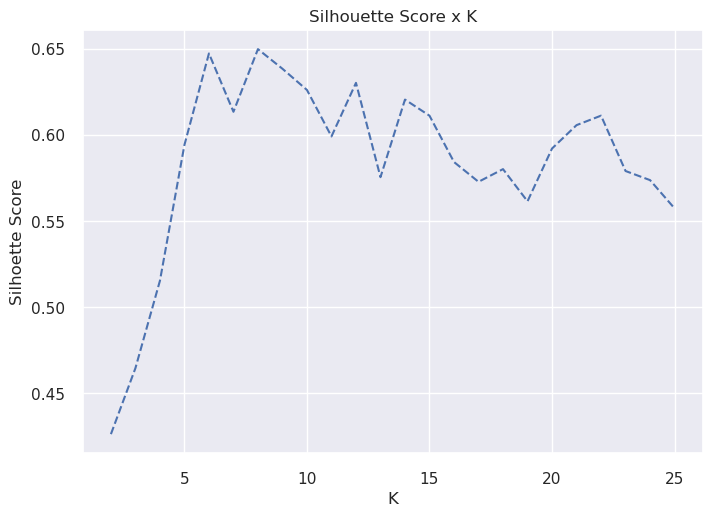

In [25]:
sns.lineplot(x= clusters, y = gmm_list, markers='o', linestyle = '--', color = 'b' )
plt.title('Silhouette Score x K')
plt.xlabel ('K')
plt.ylabel ('Silhoette Score')

## Hierarchical Clustering

[]

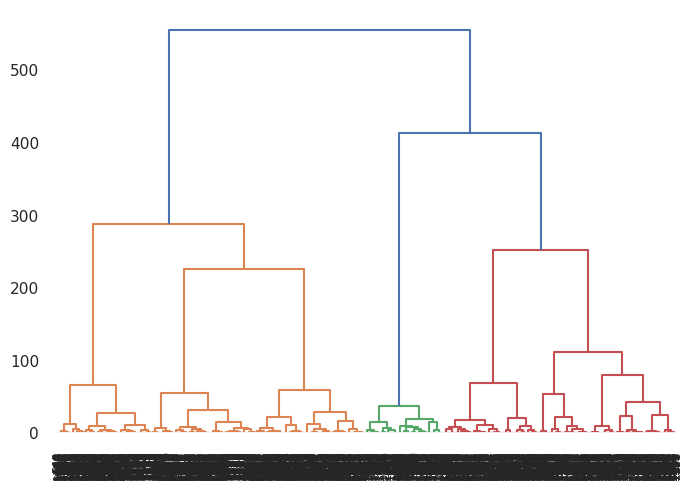

In [26]:
# model training and predict
hc_model = hc.linkage(X,'ward')

# ploting dendrogram
hc.dendrogram(
    hc_model, 
    leaf_rotation = 90, 
    leaf_font_size = 8
)

plt.plot()

Usualmente, a escolha do k acontece visualmente, sobre a maior vertical do dendograma, ja que ela representa a disntacia entre dois clusters. Com isso, estima-se o corte em que os clusters ficam mais distantes 

[]

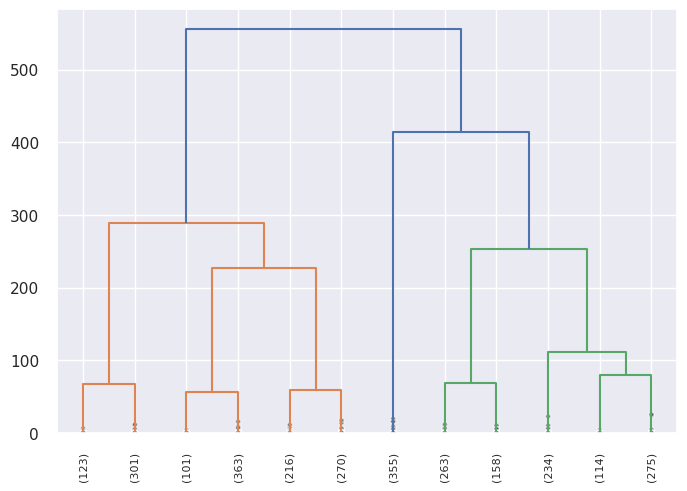

In [27]:
# ploting truncate dendogram
hc.dendrogram(
    hc_model, 
    truncate_mode = 'lastp',
    p =12,
    leaf_rotation = 90, 
    leaf_font_size = 8,
    show_contracted =True
)

plt.plot()

Mas dado que esse metodo de escolha do k nao se aplica aos outros modelos, foi feito a avaliação tambem da **silhouette score** para esse modelo

### HClustering Silhouette Score

In [28]:
hc_list =[]
for k in clusters:
    # model definition and training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster (hc_model, k, criterion= 'maxclust') #se k é declarado, é necessario informar o criterio

    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean') # após a definicao dos labels é feito o calculo da soma das silhuetas
    hc_list.append(sil)

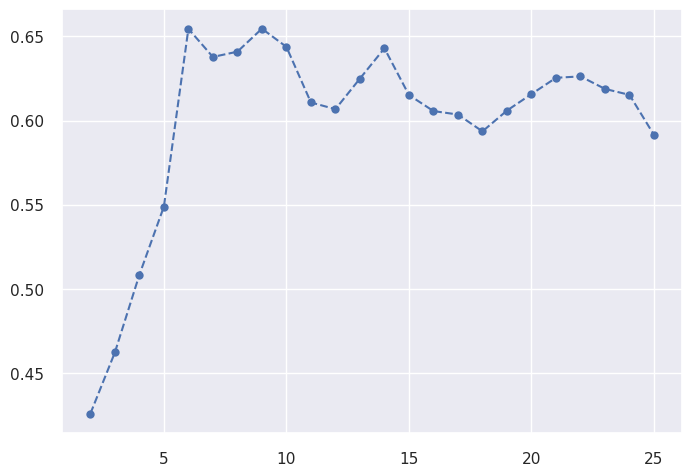

In [29]:
plt.plot(clusters, hc_list, marker='o', linestyle='--', color = 'b')

### Silhouette Analysis

For K = 2. Silhouette Score: 0.4261011481285095
For K = 3. Silhouette Score: 0.462421178817749
For K = 4. Silhouette Score: 0.5084863901138306
For K = 5. Silhouette Score: 0.5489566922187805
For K = 6. Silhouette Score: 0.6544560790061951
For K = 7. Silhouette Score: 0.6377630233764648


IndexError: index 3 is out of bounds for axis 0 with size 3

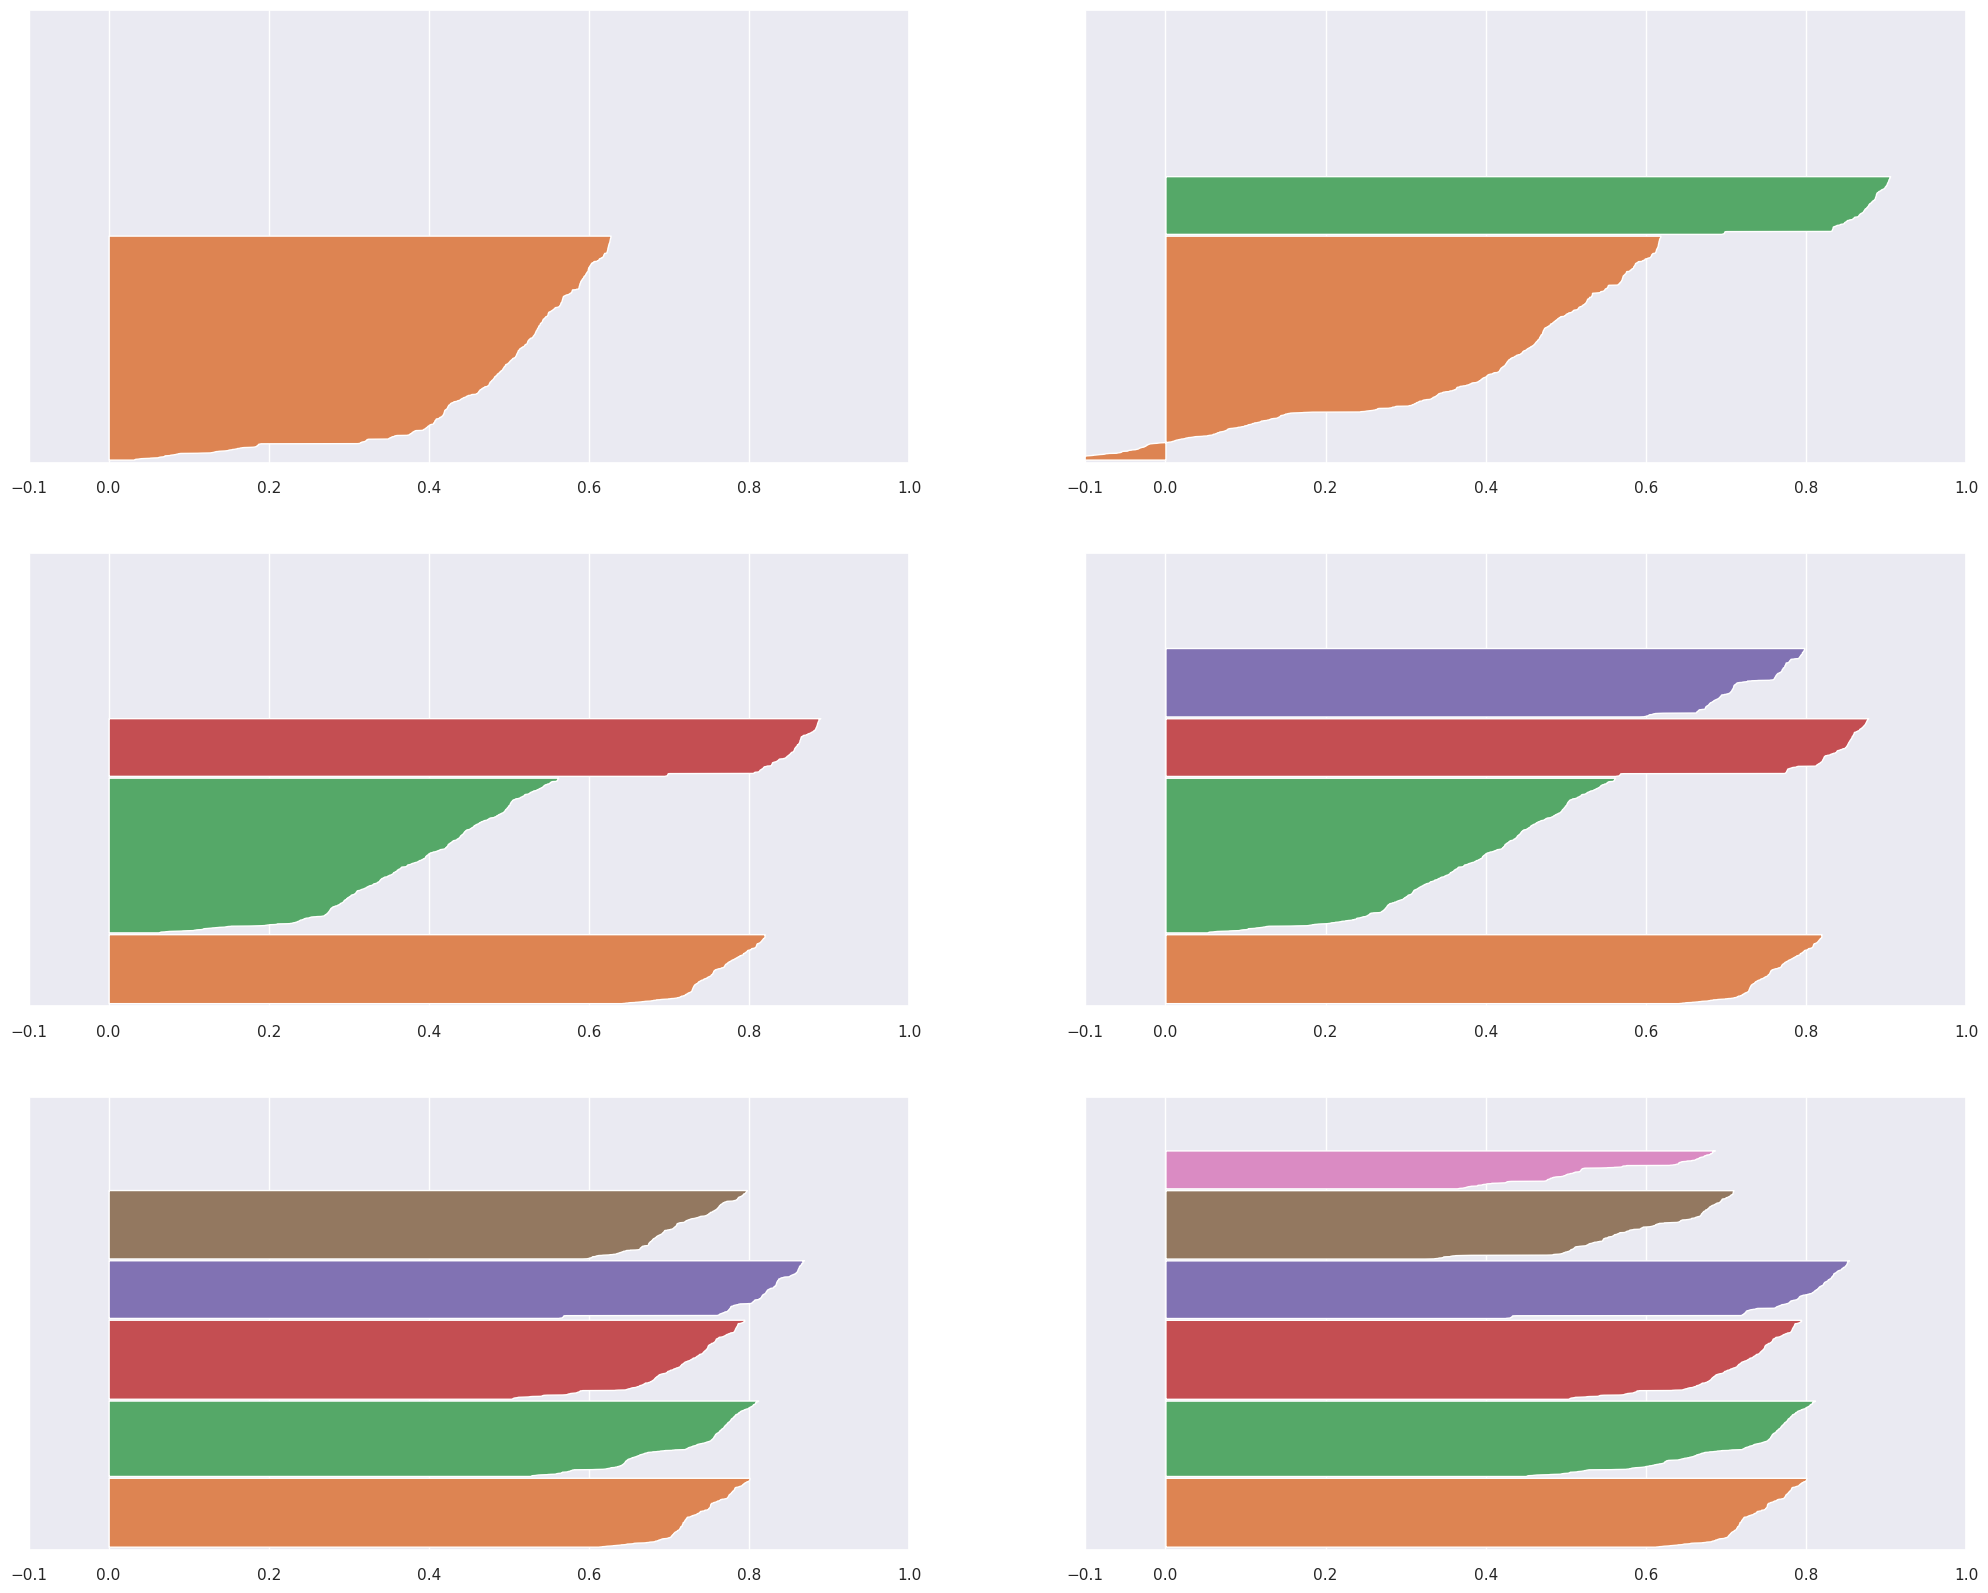

In [30]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(25,20)

for k in clusters:
    q, mod = divmod(k,2)
    
    ax[q-1,mod].set_xlim([-0.1, 1])
    ax[q-1,mod].set_ylim([0, len(X)+(k+1)])
    
    # model definition and training
    hc_model = hc.linkage(X, 'ward')

    # predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    # performance
    sil_score = m.silhouette_score(X,labels, metric= 'euclidean')
    print('For K = {}. Silhouette Score: {}'.format(k, sil_score))
    
    samples_silhouette_values = m.silhouette_samples(X, labels) #retorna os valores individuais de silhueta 
    
    y_lower = 10


    for i in range(k):

        #select clusters
        ith_samples_silhouette_values = samples_silhouette_values[labels==i]

        #sort values
        ith_samples_silhouette_values.sort()
        
        #size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]

        #limits
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap('Spectral')
        color = cmap(i/k)
        
        ax[q-1,mod].fill_betweenx(np.arange(y_lower,y_upper), 0, ith_samples_silhouette_values)  
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## DBScan

In [33]:
eps = 4
min_samples = 6


# model definition
dbscan_model = c.DBSCAN (eps = eps, min_samples = min_samples)

# training & predict
labels = dbscan_model.fit_predict (X)

# performance
sil = m.silhouette_score(X, labels, metric = 'euclidean')
print ('Silhouette Score: {}'.format(sil))
print ('Number of  k: {}'.format (len(unique(labels)))) #esta pegando o ruido aqui tambem 
print ('Labels: {}'.format(labels))

dbscan_list = [0 for i in range(0, len(clusters)-1)]
dbscan_list.insert(0,sil)

Silhouette Score: 0.293183296918869
Number of  k: 5
Labels: [0 0 0 ... 1 0 4]


**Definindo o eps (ou raio)**<br>
Uma tecnica é utilizar o NeearestNeighbor para calcular as distancias dos pontos em relacao aos seus vizinhos mais proximos. Selecionando um ponto e plotando no grafico as distancias dele para os outros pontos, ve-se que a curva se acentua em dado patamar, que podemos chamar de cotovelo. Esse valor de distancia pode ser usado como um hiperparametro para o DBSCAN

In [34]:
# model definition and training
neighbors = NearestNeighbors (n_neighbors = min_samples).fit(X)

# distances
distances , indices = neighbors.kneighbors(X)

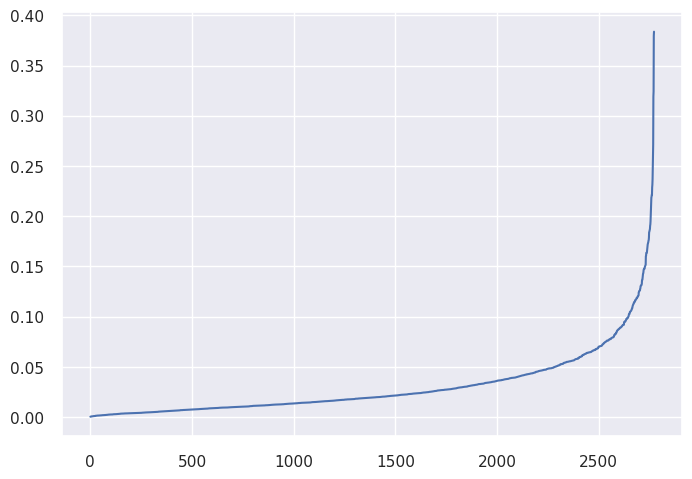

In [35]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## Results

In [36]:
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25])

In [37]:
results = pd.DataFrame(
    {'k-means': kmeans_list, 
     'gmm'    : gmm_list, 
     'hc'     : hc_list, 
     'dbscan' : dbscan_list
    }
).T

results.columns = clusters
results.style.highlight_max(color = 'lightgreen', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
k-means,0.426500,0.477783,0.529023,0.599178,0.656519,0.661232,0.649791,0.633910,0.612719,0.635096,0.617174,0.626720,0.619329,0.572696,0.597059,0.602844,0.568602,0.595956,0.609325,0.602124,0.584331,0.537955,0.551094,0.550655
gmm,0.426350,0.464642,0.515370,0.594204,0.647284,0.613436,0.649791,0.638396,0.626086,0.599126,0.630219,0.575492,0.620519,0.611163,0.584276,0.572795,0.580150,0.561473,0.592113,0.605681,0.611191,0.579061,0.573771,0.557375
hc,0.426101,0.462421,0.508486,0.548957,0.654456,0.637763,0.640884,0.654521,0.643743,0.610746,0.606786,0.624922,0.642882,0.615182,0.605648,0.603592,0.593597,0.605949,0.615728,0.625388,0.626219,0.618799,0.615258,0.591466
dbscan,0.293183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
results.style.highlight_max(color = 'lightgreen', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
k-means,0.422552,0.477904,0.479853,0.485713,0.512564,0.538708,0.586569,0.607972,0.624365,0.616902,0.636909,0.628070,0.595667,0.606754,0.618545,0.602930,0.630156,0.616331,0.630464,0.632576,0.612077,0.602680,0.639427,0.623373
gmm,0.373549,0.477123,0.460210,0.436549,0.407881,0.470702,0.566138,0.608114,0.624496,0.642277,0.613986,0.627196,0.629694,0.620610,0.613340,0.626306,0.607879,0.614217,0.626891,0.635948,0.618848,0.615898,0.624311,0.624861
hc,0.356137,0.441040,0.479853,0.510434,0.522879,0.562141,0.563411,0.595530,0.601508,0.618593,0.636374,0.633297,0.638314,0.631546,0.624130,0.632506,0.642958,0.633428,0.639370,0.646008,0.643624,0.643792,0.636755,0.641572
dbscan,0.552113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [97]:
# results.style.highlight_max(color = 'lightgreen', axis=1)

,2,3,4,5,6,7
k-means,0.719278,0.589859,0.568843,0.592083,0.487441,0.490199
gmm,0.605698,-0.039521,-0.070482,0.033800,0.016248,-0.042249
hc,0.707983,0.582215,0.542305,0.555421,0.556307,0.560009
dbscan,0.569625,0.000000,0.000000,0.000000,0.000000,0.000000


## Metrics Definition

Definidas no primeiro ciclo, servirao de base para as outras iteracoes

### WSS (Within-Cluster Sum of Square)

WSS representa a compacidade de cada cluster, para cada numero de cluster criados (K). 

A escolha de K clusters é uma avaliação do analista, e aqui sera feita pelo metodo do cotovelo de forma *manual* e usando a bibliotexa *yellowbricks*

In [97]:
clusters = [2, 3, 4, 5, 6, 7]

In [98]:
# # Manual

# # empty list to append values of wss for each k
# wss = []

# for k in clusters:
#     # Instancing the model 
#     kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter = 300, random_state=42)
    
#     # Model training
#     kmeans.fit(X)
    
#     # Validation
#     wss.append(kmeans.inertia_) 
    
# # Plot WSS
# plt.plot (clusters, wss, linestyle = '--', marker='o', color='b');
# plt.xlabel('K');
# plt.ylabel('Within-Cluster Sum of Square');
# plt.title('WSS vs K');

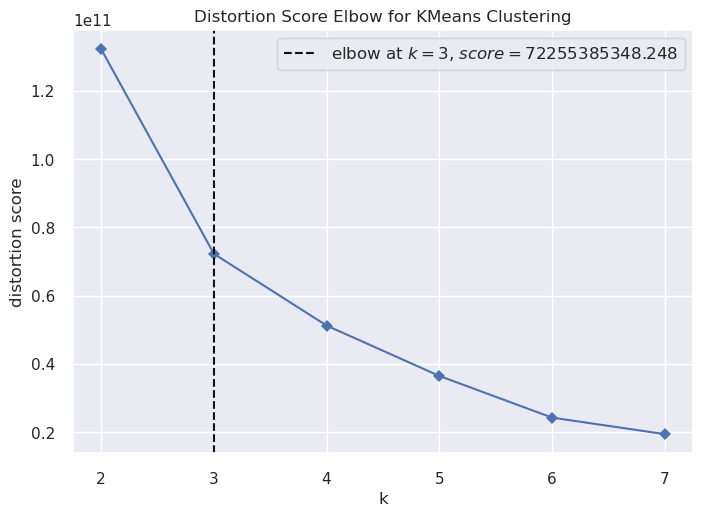

In [99]:
# Yellowbricks
kmeans = KElbowVisualizer(c.KMeans(), k=clusters,n_init=10 ,timings= False);
kmeans.fit(X);
kmeans.show();


### Silhouete Score

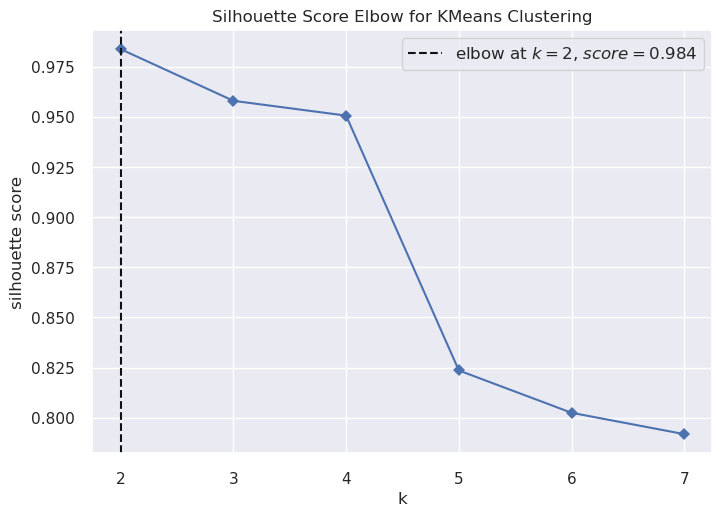

In [100]:

kmeans = KElbowVisualizer(c.KMeans(), k=clusters,n_init=10,metric='silhouette' ,timings= False);
kmeans.fit(X);
kmeans.show();

A silhueta representa tanto a compacidade do cluster, quanto a distancia entre eles. Quanto mais proximo de 1 diz que a razao entre a(1) e b(1) aproxima de zero, sendo:

- a(1): media da distancia entre ponto do cluster em relação aos demais do mesmo cluster
- b(1): media da distancia de um ponto em relaçao aos pontos do cluster vizinho mais proximo 



### Silhouette Analysis

*Essa analise de silhueta só tem implementacao para o KMeans. Para os outros algoritmos tem que ser feito manualmente*

In [101]:
clusters

[2, 3, 4, 5, 6, 7]

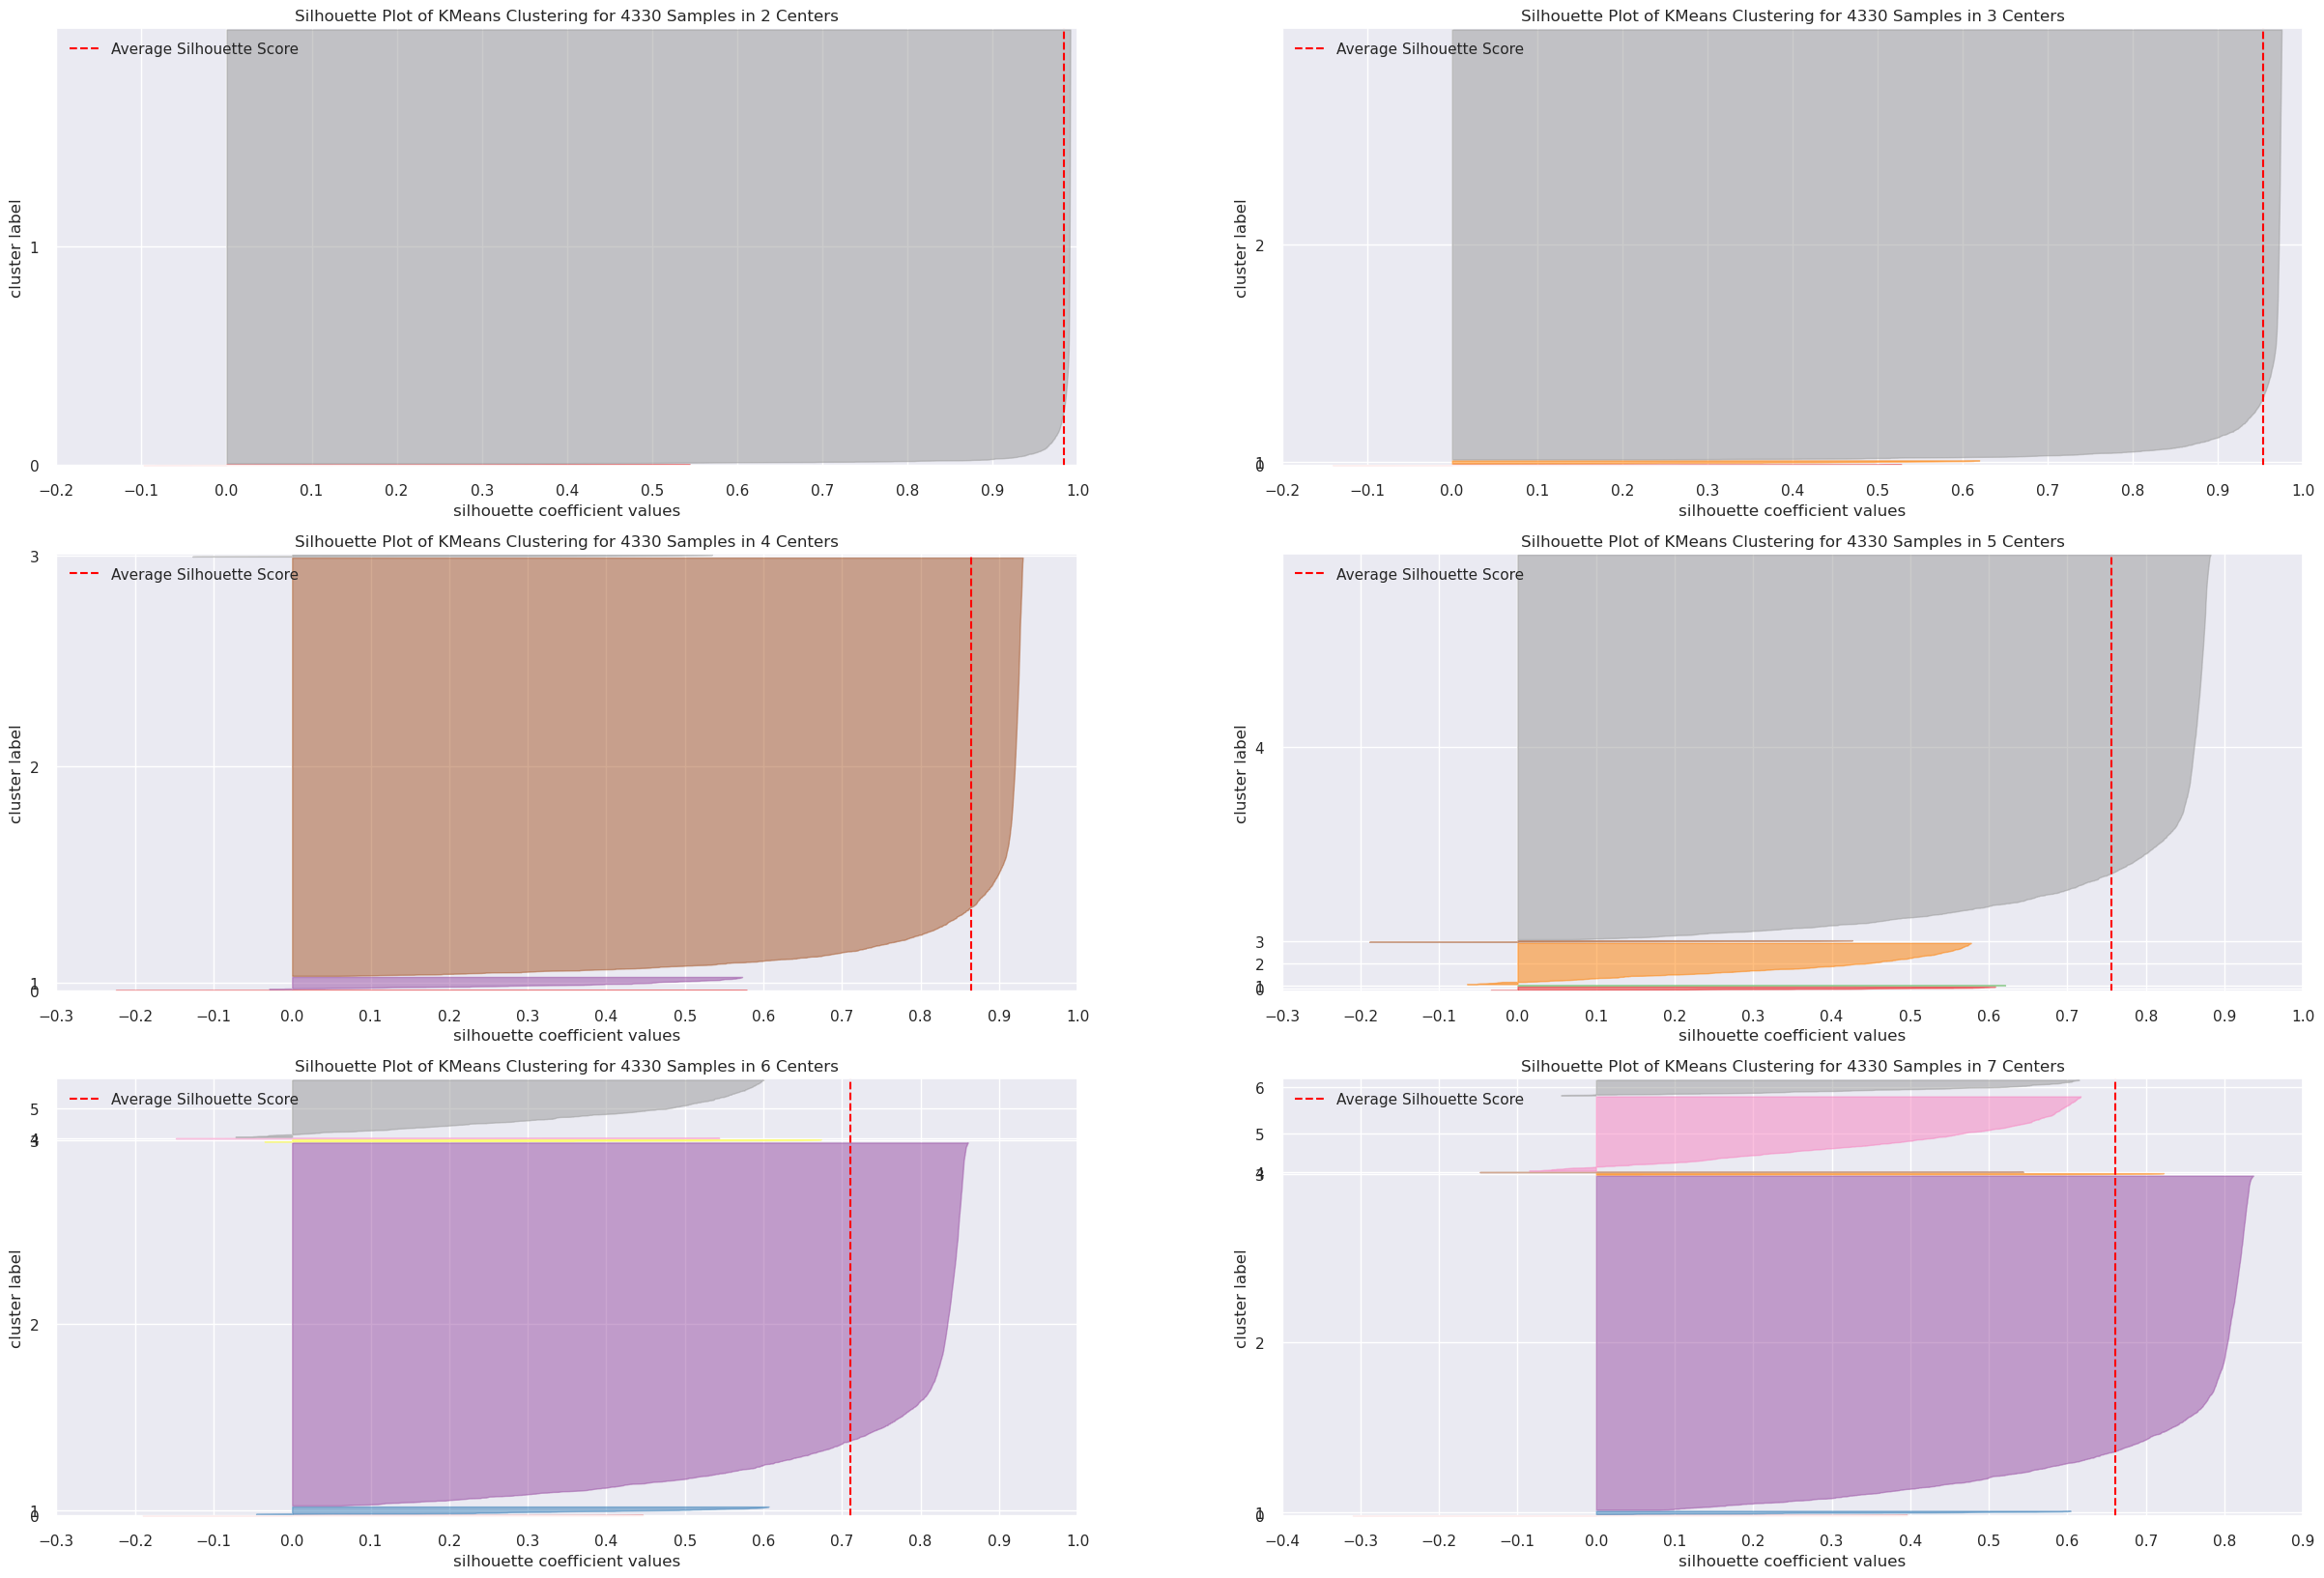

In [102]:
fig, ax = plt.subplots (3, 2, figsize=(30,20))
for k in clusters:
    km = c.KMeans(n_clusters = k, init='random', n_init = 10, max_iter = 100, random_state =42)
    q,mod = divmod(k,2) #operação modulo retorna resto da divisao em mod e 'k' em 'q'. a tupla é k e o valor minimo da lista
    visualizer = SilhouetteVisualizer(km, color = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

A analise das silhuetas mostra que ha um cluster predominante, mais coeso e distante, porem os outros clusters estao muito esparsos 

# <span style="color: OrangeRed;">MODEL TRAINING</span>
<span style="color: OrangeRed;">***PASSO 8***</span>

In [15]:
# Espaço de embedding RandomForest reduzida pelo UMAP
X.head()

,embedding_x,embedding_y
0,16.70,16.60
1,16.12,6.06
2,18.18,15.48
3,5.07,15.09
4,-0.46,11.59


## K-Means

In [16]:
k = 8 
# Instancing the model 
kmeans = c.KMeans(init = 'random', n_clusters=k, n_init = 10, max_iter=300, random_state=42)

# Model Training
kmeans.fit(X)

# Labels
labels = kmeans.labels_

## Gaussian Mixture Model 

In [182]:
# model name
gmm_model = mx.GaussianMixture (n_components = k, random_state =10)

# model training
gmm_model.fit(X)

# predict
labels = gmm_model.predict (X)  
    

In [149]:
# array com par de valores do embedding. 
# gmm_model.means_

# soma do par de valores do embedding
# gmm_model.means_.sum(axis=1)

# variavel que armazena um array de indices que ordenam os valores do array acima
# idx = np.argsort(gmm_model.means_.sum(axis=1))

# new cluster label. cria um array com mesmo shape do argumento e mesma ordenacao
# new_cluster_label = np.zeros_like(idx)

# cluster name
# cluster_name = [10, 11, 12, 13, 14, 15, 16, 17]
# 
# new_cluster_label recebe cluster_name ordenado pelos indices de idx
# new_cluster_label [[0, 1, 2, 3, 4, 5, 6,7]] = cluster_name 

# # 
# labels = new_cluster_label[labels]

## Cluster validation

In [155]:
# WSS (Within-cluester Sum of Square)
print('WSS value: {}'.format(kmeans.inertia_))

# Silhoute Score
print('Silhouette Score: {}'.format (m.silhouette_score (X, labels, metric = 'euclidean')))

WSS value: 15416.103515625
Silhouette Score: 0.6497910618782043


# <span style="color: OrangeRed;">CLUSTER ANALYSIS</span>
<span style="color: OrangeRed;">***PASSO 9***</span>

In [183]:
# df9 = df6.drop(columns = ['customer_id']).copy()

# tabela de customers_ com label do cluster
df92 = df4.copy()
df92['labels'] = labels.tolist()
# df9 = df4.copy()
# df9['labels'] = labels.tolist()

# embedding com label do cluster
df9 = X.copy()
df9['labels'] = labels.tolist()


## Visualization Inspection

In [142]:
# fig = px.scatter_3d(df9, x='recency',y='frequency', z= 'monetary', color = 'labels')
# fig.show()
# Como a dimensionalidade esta >3 nao é possivel plotar os labels em torno dos eixos. 

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

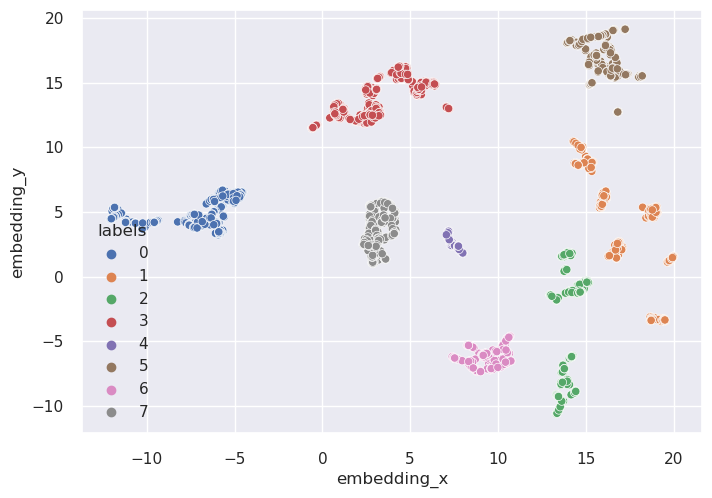

In [170]:
#ploting the embedding space + labels
sns.scatterplot (x = 'embedding_x', y = 'embedding_y', data = df9, hue = 'labels', palette = 'deep')

## 2d plot

Essa analise plota as features 2 a 2 e ajuda a entender quais pares geram grupos 'bons' e quais bagunçam o conjunto

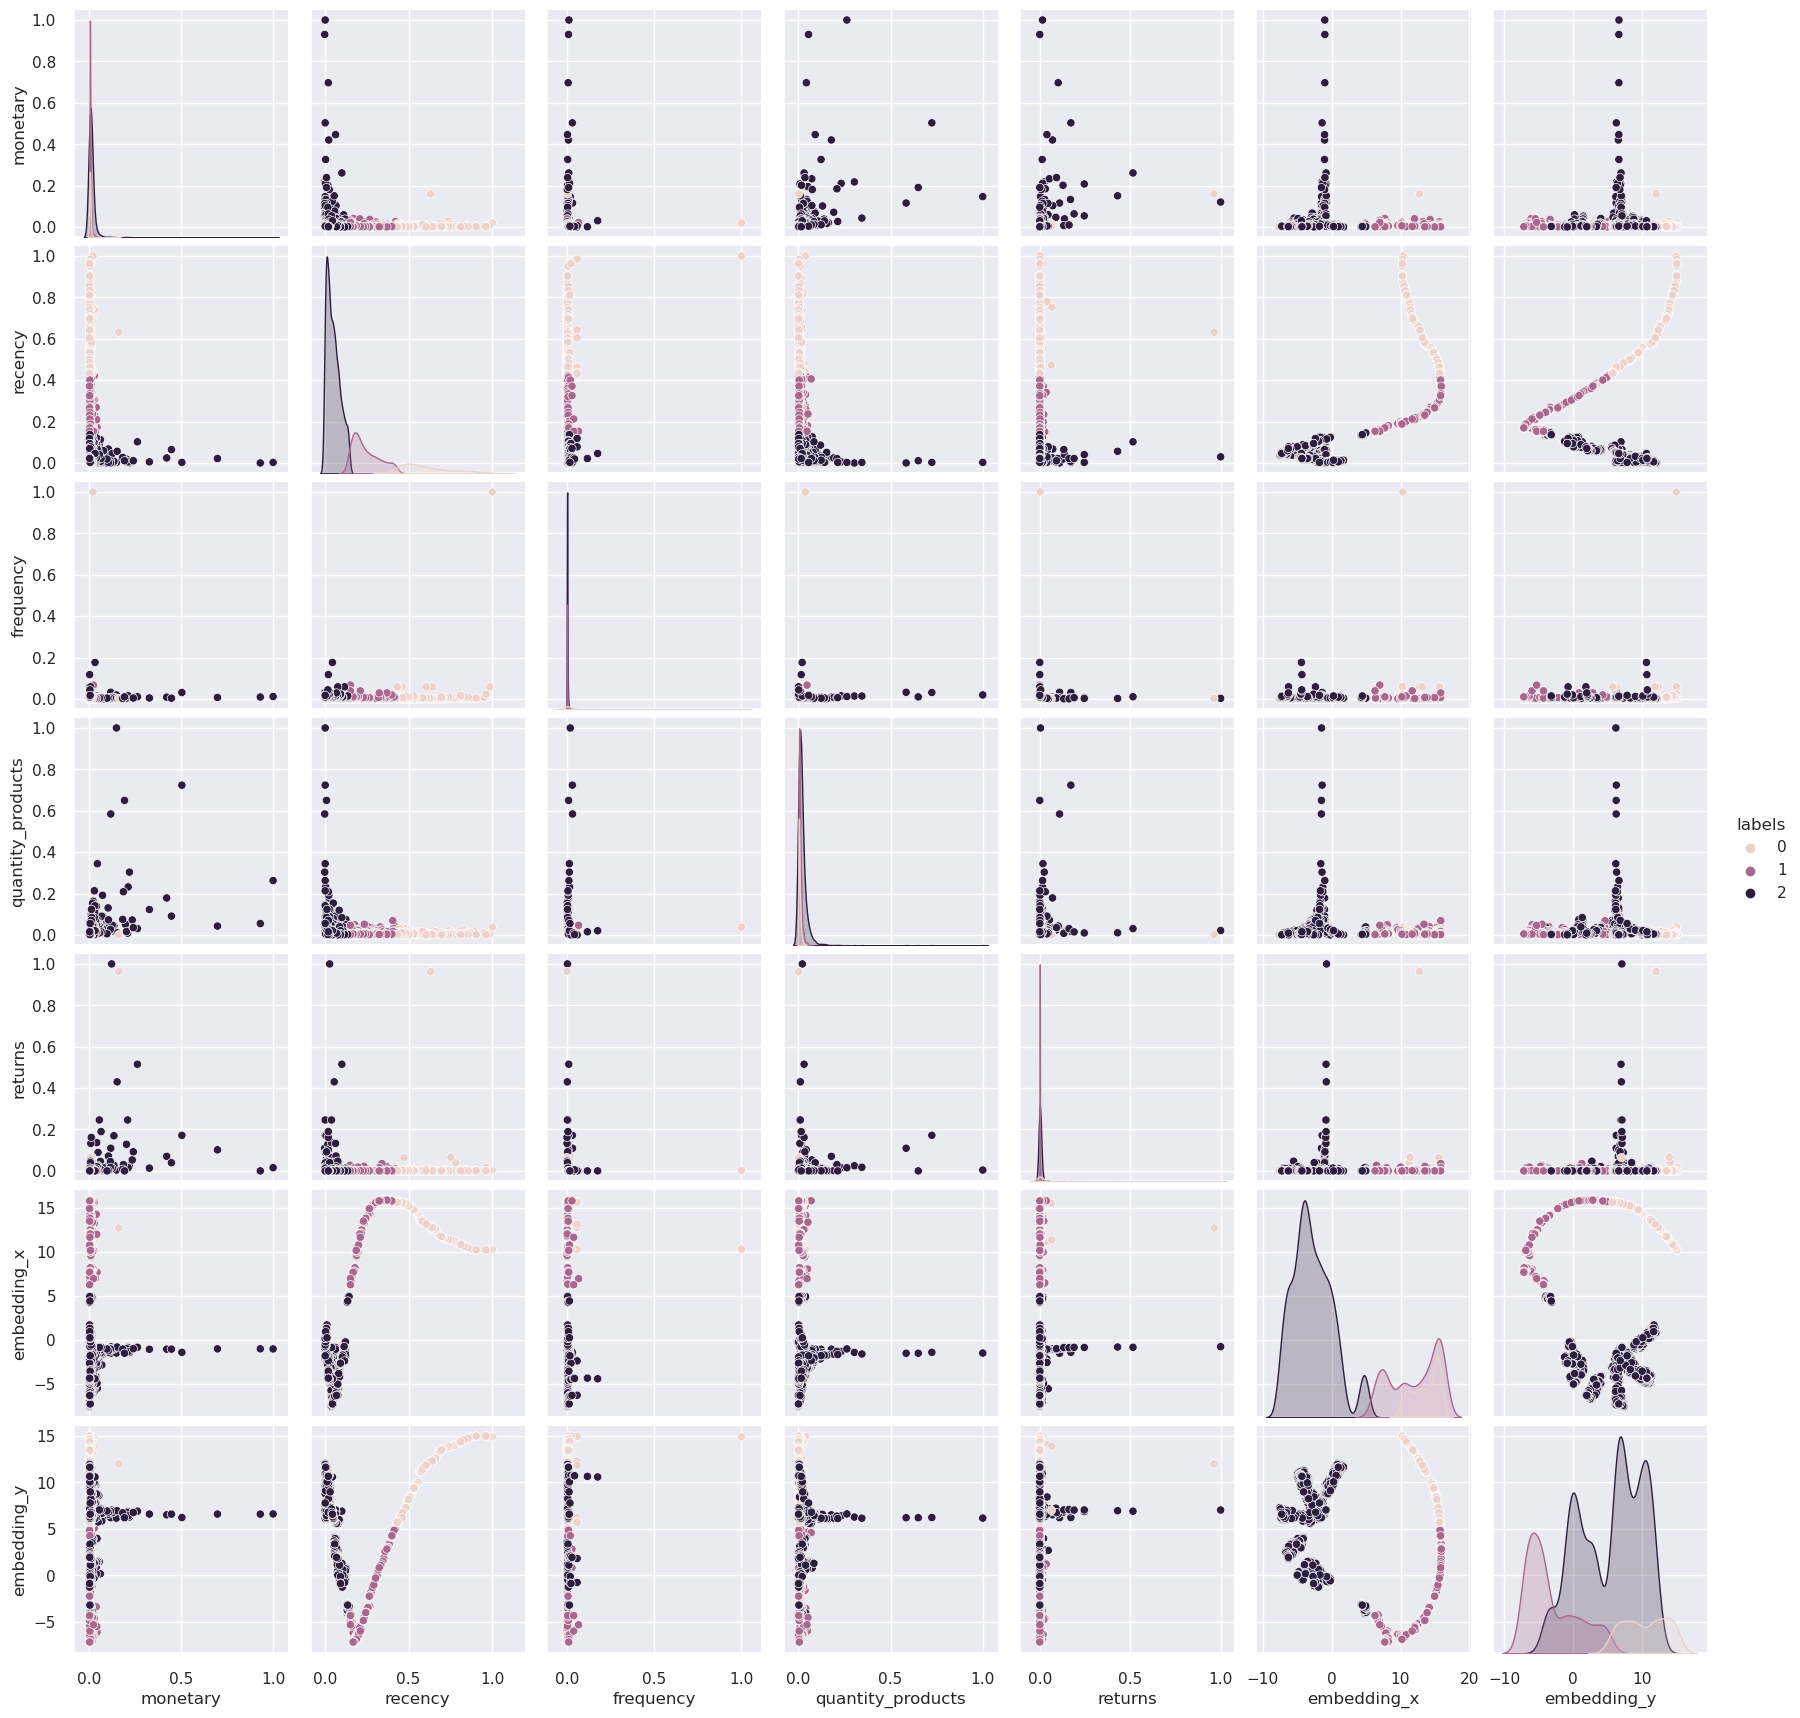

In [104]:
sns.pairplot(df_viz, hue='labels')

Por esse grafico, nota-se pouca separacao entre os clusters. Porem, em dimensionalidades maiores (3D+) a formação dos clusters pode ser mais evidente, e por isso há um risco em se dropar features apenas por essa analise

## Silhouette Analysis

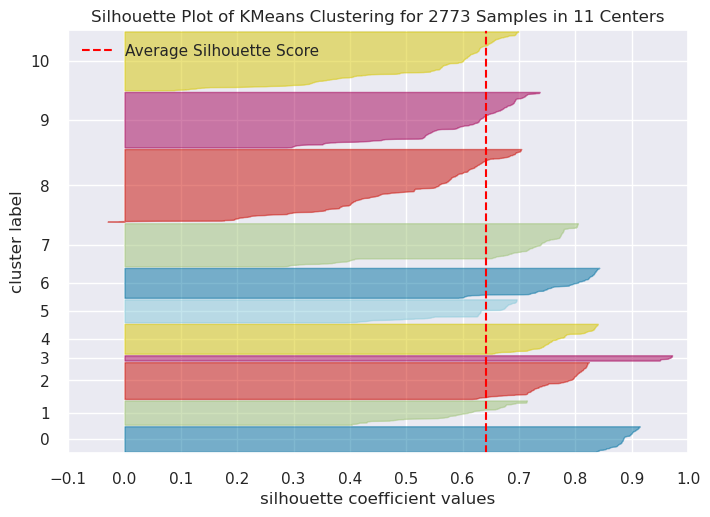

In [68]:
visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer.fit (X)
visualizer.finalize()

## UMAP

In [117]:
df_viz = df9.copy()


Tecnica para reducao de altas dimensionalidades. Essa representação nao diz sobre a distancia entre os clusters na alta dimensionalidade, mas informa mais o quão homogeneo estao

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

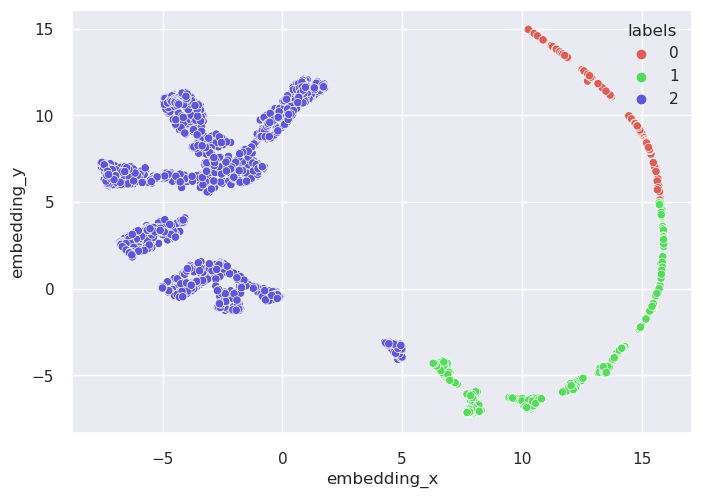

In [118]:
reducer = umap.UMAP (n_neighbors=30 , random_state=42) #n_neighbors quanto menor, ele foca mais nas estruturas locais em vez das globais
embedding = reducer.fit_transform (X) #espaço projetado após reducao de dimensionalidade

#embedding
df_viz ['embedding_x'] = embedding[:, 0]
df_viz ['embedding_y'] = embedding[:,1]

# plot embeding
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='labels',
                palette=sns.color_palette('hls', n_colors=len(df_viz['labels'].unique())),
                data = df_viz)



## T-SNE

## Cluster Profile

In [184]:
# df_aux with the added labels to df6
# df_aux = df6.copy()
# df_aux['labels'] = labels.tolist()

df_aux = df92.copy()

In [185]:
# Number of customers
df_cluster = df_aux[['customer_id', 'labels']].groupby('labels').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum())*100


# Avg Monetary
df_avg_monetary = df_aux[['monetary','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_monetary, how='inner', on = 'labels')


# Avg  Recency 
df_avg_recency = df_aux[['recency','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency, how='inner', on = 'labels')


# Avg Frequency
df_avg_frequency = df_aux[['frequency','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_frequency, how='inner', on = 'labels')


# Quantity products
df_quantity_products = df_aux[['quantity_products','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_quantity_products, how='inner', on = 'labels')


# Returns
df_returns = df_aux[['returns','labels']].groupby('labels').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_returns, how='inner', on = 'labels')

# Avg Ticket
# df_avg_ticket = df_aux[['labels','avg_ticket']].groupby('labels').mean().reset_index()
# df_cluster = pd.merge(df_cluster,df_avg_ticket,how ='inner', on='labels')

# Avg Basket
# df_avg_basket = df_aux[['labels','avg_basket']].groupby('labels').mean().reset_index()
# df_cluster = pd.merge(df_cluster,df_avg_basket,how ='inner', on='labels')

df_cluster

,labels,customer_id,perc_customer,monetary,recency,frequency,quantity_products,returns
0,0,424,15.29,582.10,94.91,0.06,14.34,1.15
1,1,272,9.81,3138.30,33.38,0.05,183.97,25.05
2,2,194,7.00,894.07,64.64,0.04,29.45,2.16
3,3,421,15.18,2589.33,50.05,0.03,97.69,8.25
4,4,464,16.73,1210.98,58.92,0.03,57.60,4.40
5,5,355,12.80,11098.79,17.79,0.11,485.75,165.77
6,6,292,10.53,1000.00,84.58,0.04,35.67,9.86
7,7,351,12.66,2083.64,45.00,0.03,134.93,14.66


**Ações de negocio sugeridas**

**Cluster 0**
- Cenario: 
- Ação: 
    
**Cluster 1**
- Cenario: 
- Ação: 
    
**Cluster 2**
- Cenario: 
- Ação: 

### Cluster Profile 

In [147]:
df_cluster

,labels,customer_id,perc_customer,monetary,recency,frequency,quantity_products,returns
0,0,260,9.38,3142.41,33.46,0.04,184.55,26.19
1,1,101,3.64,1370.21,57.92,0.04,69.06,4.62
2,2,424,15.29,582.10,94.91,0.06,14.34,1.15
3,3,486,17.53,957.72,76.62,0.04,33.19,6.79
4,4,421,15.18,2589.33,50.05,0.03,97.69,8.25
5,5,355,12.80,11098.79,17.79,0.11,485.75,165.77
6,6,363,13.09,1166.68,59.20,0.03,54.42,4.34
7,7,363,13.09,2115.56,44.56,0.04,136.13,14.19


**Cluster 5 - Candidato a INSIDERS**
- Numero de customers: 355 (12.80%)
- Faturamento medio: $ 11,098
- Recencia media: 18 dias
- Media de produto: 485 produtos por compra
- Frequencia de compras por mes: 0.11 compras/dia
    
**Cluster 1 - ...**

#  <span style="color: OrangeRed;">EXPLORATORY DATA ANALYSIS (EDA) PT2</span>
<span style="color: OrangeRed;">***PASSO 10*** </span>

In [120]:
cols_selected = ['customer_id','monetary', 'recency', 'frequency', 'quantity_products', 'returns','labels']

df10 = df92[cols_selected].copy()

## MindMap de Hipoteses


1. Fenomemo
2. Entidades
3. Caracteristicas das entidades

## Hipoteses de Negocio


1. Afirmação
2. Comparação entre variaveis
3. Valor base de comparação

*"Se eu te trouxer a resposta dessa hipotese, o que voce vai fazer a partir dela?*<br>Pergunta para mensurar o impacto da analise e se é ou não **acionavel**


### Hipoteses de Compra

Afirmação | Cluster | Valor de base(chute)

1. Os clientes do Insiders usam cartao de credito em 80% das compras
2. Os clientes do Insiders tem ticket medio 10% maior que o cluster More Products
3. Os clientes do Insiders tem um basket size acima de 5 produtos
4. **Os clientes do Insiders possuem um volume de compras(produtos) correspondente a mais de 10% do volume total**
5. **Os clientes do Insiders possuem um volume de compras(receita total) correspondente a mais de 10% do volume total**
6. **Os clientes do Insiders possuem um volume de devolucoes abaixo da media do conjunto total de clientes**
7. **A mediana do faturamento dos clientes Insiders é 10% maior que a mediana do faturamento geral**
8. **Percentil gmv pelos clientes insiders**

#### H1.  Os clientes do Insiders possuem um volume de compras (produtos) correspondente a mais de 10% do volume total


In [121]:
df_aux = df10.groupby('labels').agg({'quantity_products':'sum'}).reset_index()
df_aux['total'] = df_aux['quantity_products'].sum()
df_aux['percentage'] = df_aux.apply(lambda x: x['quantity_products']/x['total'],axis=1)

print('O volume de produtos do Insiders corresponde a {:.0f}% do total'.format(df_aux['percentage'].max()*100))

df_aux

O volume de produtos do Insiders corresponde a 48% do total


,labels,quantity_products,total,percentage
0,0,47982.00,359905.00,0.13
1,1,6975.00,359905.00,0.02
2,2,6081.00,359905.00,0.02
3,3,16129.00,359905.00,0.04
4,4,41127.00,359905.00,0.11
5,5,172441.00,359905.00,0.48
6,6,19753.00,359905.00,0.05
7,7,49417.00,359905.00,0.14


#### H2.  Os clientes do Insiders possuem um volume de compras (receita total) correspondente a mais de 10% do volume total


In [122]:
df_aux = df10.groupby('labels').agg({'monetary':'sum'}).reset_index()
df_aux['total'] = df_aux['monetary'].sum()
df_aux['percentage'] = df_aux.apply(lambda x: x['monetary']/x['total'],axis=1)

print('O faturamento do Insiders corresponde a {:.0f}% do total'.format(df_aux['percentage'].max()*100))

df_aux

O faturamento do Insiders corresponde a 50% do total


,labels,monetary,total,percentage
0,0,817025.45,7889308.25,0.10
1,1,138391.52,7889308.25,0.02
2,2,246808.78,7889308.25,0.03
3,3,465449.97,7889308.25,0.06
4,4,1090107.57,7889308.25,0.14
5,5,3940071.54,7889308.25,0.50
6,6,423504.29,7889308.25,0.05
7,7,767949.13,7889308.25,0.10


In [123]:
df10.head()

,customer_id,monetary,recency,frequency,quantity_products,returns,labels
0,17850,5391.21,372.00,17.00,297.00,21.00,5
1,13047,3232.59,56.00,0.03,171.00,6.00,0
2,12583,6705.38,2.00,0.04,232.00,50.00,5
3,13748,948.25,95.00,0.02,28.00,0.00,3
4,15100,876.00,333.00,0.07,3.00,22.00,3


#### H3. Os clientes do Insiders possuem um volume medio de devolucoes abaixo da media do conjunto total de clientes

In [124]:
df_aux = df10.groupby('labels').agg({'returns':'mean'}).reset_index()
df_aux['avg_returns'] = df10['returns'].mean()
df_aux['diff_of_mean'] = df_aux['returns']- df_aux['avg_returns'] 

In [125]:
df_aux

,labels,returns,avg_returns,diff_of_mean
0,0,26.19,28.89,-2.70
1,1,4.62,28.89,-24.27
2,2,1.15,28.89,-27.74
3,3,6.79,28.89,-22.10
4,4,8.25,28.89,-20.64
5,5,165.77,28.89,136.88
6,6,4.34,28.89,-24.55
7,7,14.19,28.89,-14.70


#### H4. A mediana do faturamento dos clientes Insiders é 10% maior que a mediana do faturamento geral

In [126]:
df_aux = df10.groupby('labels').agg({'monetary':'median'}).reset_index()
df_aux['total'] = df_aux['monetary'].median()
df_aux['percentage'] = df_aux.apply(lambda x: (x['monetary']/x['total'])-1,axis=1)

print('A mediana do faturamento do Insiders é {:.0f}% maior que a mediana do faturamento geral'.format(df_aux['percentage'].max()*100))

df_aux

A mediana do faturamento do Insiders é 275% maior que a mediana do faturamento geral


,labels,monetary,total,percentage
0,0,2601.92,1350.99,0.93
1,1,1156.36,1350.99,-0.14
2,2,380.48,1350.99,-0.72
3,3,666.49,1350.99,-0.51
4,4,1545.62,1350.99,0.14
5,5,5070.35,1350.99,2.75
6,6,939.37,1350.99,-0.30
7,7,1814.12,1350.99,0.34


#### H5. O GMV dos Insiders esta mais concentrado no quartil 3
**Falso** O GMV esta mais concentrado no quartil 2

In [127]:
np.percentile(df10.loc[:, 'monetary'], q=0.1)

60.09756

In [128]:
np.percentile(df10.loc[:, 'monetary'], q=0.9)

144.86268000000004

<AxesSubplot: xlabel='monetary'>

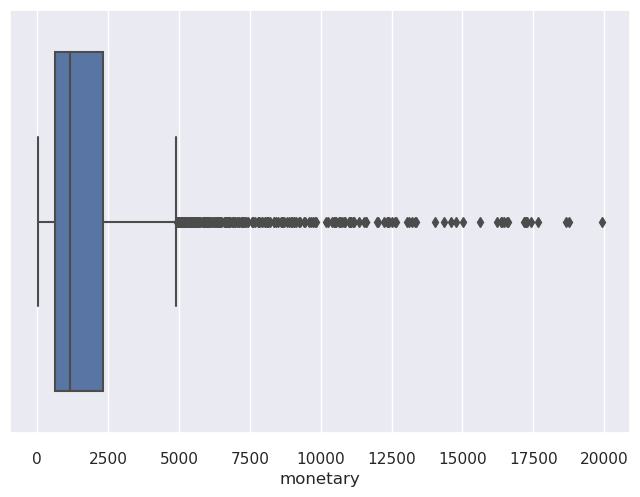

In [129]:
sns.boxplot(x=df10.loc[df10['monetary']<20000, 'monetary'])

### Hipoteses de Cliente

1. Os clientes do Insiders possui uma proporção de 60% do publico feminino
2. 10% dos clientes do Insiders possuem entre 24-35 anos
3. 40% das localidades de entrega estao em um raio de 50km
4. 5% dos clientes do Insiders recebem mais de 100mil dolares anuais
5. 90% dos Insiders tem ensino superior

### Hipoteses de Produto

1. 30% dos produtos em pacotes grandes sao comprados pelo grupo dos Insiders
2. A mediana dos preços dos produtos comprados pelos Insiders é 10% maior que a mediana dos preços dos produtos comprados pela base
3. O percentil do preço dos produtos 
4. O peso medio dos produtos comprados pelos Insiders é 20% maior que o peso medio dos outros clusters
5. Clientes do Insiders tem uma idade media dos produtos menor que 20 dias

## Perguntas de Negocio

### 1. Quem sao as pessoas elegiveis para participar do programa?

In [130]:
df10.loc[df10['labels']==5, :].sample(10)

,customer_id,monetary,recency,frequency,quantity_products,returns,labels
2020,16940,3049.88,52.00,0.01,305.00,0.00,5
1506,14534,4445.40,2.00,0.06,518.00,59.00,5
544,13113,12245.96,0.00,0.07,200.00,251.00,5
2719,17758,3456.70,19.00,0.03,412.00,0.00,5
15,17511,91062.38,2.00,0.08,963.00,125.00,5
448,13319,10845.55,5.00,0.07,476.00,13.00,5
223,18225,5509.12,3.00,0.03,271.00,24.00,5
136,14060,6140.42,4.00,0.05,202.00,12.00,5
628,15271,2507.07,7.00,0.04,274.00,5.00,5
499,13267,4521.49,2.00,0.05,211.00,16.00,5


### 2. Quantos clientes farao parte do grupo?

In [70]:
df10.loc[df10['labels']==0, :].shape[0]

355

### 3. Quais as principais caracteristicas desses clientes?

Cluster 0 - Candidato a INSIDERS

- Numero de customers: 355 (12.80%)
- Faturamento medio: $ 11,098
- Recencia media: 18 dias
- Media de produto: 485 produtos por compra
- Frequencia de compras por mes: 0.11 compras/dia


### 4. Qual a porcentagem de contribuicao do faturamento vinda dos insiders?

In [71]:
df_aux = df10.groupby('labels').agg({'quantity_products':'sum'}).reset_index()
df_aux['total'] = df_aux['quantity_products'].sum()
df_aux['percentage'] = df_aux.apply(lambda x: x['quantity_products']/x['total'],axis=1)

print('O volume de produtos do Insiders corresponde a {:.0f}% do total'.format(df_aux['percentage'].max()*100))

O volume de produtos do Insiders corresponde a 48% do total


### 5. Qual a expectativa de faturamento desse grupo para os proximos meses?

### 6. Quais as condicoes para uma pessoa ser elegivel ao Insiders?

### 7. Quais as condicoes para uma pessoa ser removida do Insiders?

### 8. Qual a garantia que o programa Insiders é melhor que o restante da base?

### 9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Priorizacao das Hipoteses


## Validação das Hipoteses


## Quadro de respostas


## MindMap de Hipoteses


# <span style="color: OrangeRed;">DEPLOY TO PRODUCTION </span>
<span style="color: OrangeRed;">***PASSO 11***</span>